<a href="https://colab.research.google.com/github/TrieuNguyen-data/Airline-Satisfaction/blob/main/%5BDA56%5D_Final_Project_Airline_Satisfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT LIBARIES & LOAD DATA

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# uploaded = files.upload()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import dataframe Train
train_data = pd.read_csv('/content/drive/MyDrive/train.csv')
# Import dataframe Test
test_data = pd.read_csv('/content/drive/MyDrive/test.csv')

### Discover train_data

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
tr_ob = train_data.select_dtypes(include = 'object').columns
for col in tr_ob:
  print(test_data[col].value_counts())
  print('===========')

Gender
Female    13172
Male      12804
Name: count, dtype: int64
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64
Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64
Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64
satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64


In [ ]:
#drop column Unname
train_data.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [ ]:
## Check Duplicated
train_data.duplicated().sum()

0

In [ ]:
# Check null
print("Check null train tables")
train_data.isnull().sum()


Check null train tables


id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

NOTE:
- Tập train có 15 cột và 103593 dòng
- Xóa cột Unnamed: 0 vì không sử dụng
- Cột Arrival Delay in Minutes có 310 dòng bị null --> chiếm khoảng 0.2% tổng quan sát --> drop các dữ liệu này
- dữ liệu không bị trùng
- Có 2 dạng dữ liệu là object, int/float

In [ ]:
def clean_data(df):
  #drop column Unname:0
  df.drop(['Unnamed: 0'],axis = 1, inplace = True)

  # Xóa dòng dữ liệu Arrival Delay in Minutes bị null
  df = df.dropna(subset=['Arrival Delay in Minutes'])

  ## set lại index của bộ dữ liệu
  df = df.dropna().reset_index(drop = True)

# clean_data(train_data)
# clean_data(test_data)

In [ ]:
# Xóa dòng dữ liệu Arrival Delay in Minutes bị null
train_data = train_data.dropna(subset=['Arrival Delay in Minutes'])

## set lại index của bộ dữ liệu
train_data = train_data.dropna().reset_index(drop = True)

In [ ]:
train_data.describe().round()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0
mean,64942.0,39.0,1189.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,15.0,15.0
std,37461.0,15.0,997.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.0,39.0
min,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,32562.0,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,64890.0,40.0,842.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,97370.0,51.0,1743.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


NOTE
- Cột Departure Delay in Minutes và Arrival Delay in Minutes có các giá trị ngoại lai không hợp lý

 Thời gian trễ trung bình khoảng 15p, tuy nhiên thời gian trễ cao nhất khoảng 1500 phút ~ 26 ngày --> không hợp lý
 cần xem xét xóa

In [ ]:
# fig, ax = plt.subplots(1,2, figsize = (7,3))
# # sns.boxplot(data=train_data,y='Flight Distance', ax = ax[0])

# sns.boxplot(data=train_data,y='Departure Delay in Minutes', ax = ax[0])
# ax[0].set_title('Distribution of Departure Delay in Minutes')
# ax[0].set_ylabel("")
# sns.boxplot(data=train_data,y='Arrival Delay in Minutes', ax = ax[1])
# ax[1].set_title('Distribution of Arrival Delay in Minutes')
# ax[1].set_ylabel("")
# plt.tight_layout();

In [ ]:
# ## Create function to drop ouliers
# def drop_outlier(df: pd.DataFrame, column: list):
#   for col in column:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     oulier = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
#     df.drop(oulier, axis = 0, inplace = True)
#   return df.reset_index()

# drop_outlier(train_data, ['Arrival Delay in Minutes'])
# drop_outlier(train_data, ['Departure Delay in Minutes'])


In [ ]:
train_data.describe().round()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0,103594.0
mean,64942.0,39.0,1189.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,15.0,15.0
std,37461.0,15.0,997.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,38.0,39.0
min,1.0,7.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,32562.0,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,64890.0,40.0,842.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,97370.0,51.0,1743.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,129880.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1592.0,1584.0


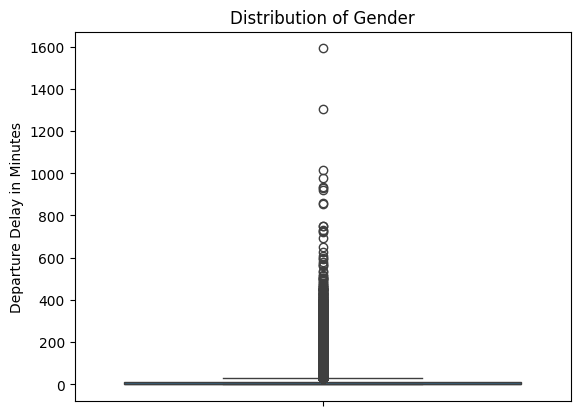

In [ ]:
sns.boxplot(data=train_data,y=train_data['Departure Delay in Minutes'])
plt.title('Distribution of Gender')
plt.show()

In [ ]:
# print(f'Tran data after drop outlier {train_data.shape}')
# print(f'Tran data after drop outlier {test_data.shape}')

### Discover Test data

In [ ]:
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [ ]:
test_data.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [ ]:
test_data.duplicated().sum()

0

In [ ]:
test_data.describe().round()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25976.0,25893.0
mean,12988.0,65006.0,40.0,1194.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,14.0,15.0
std,7499.0,37612.0,15.0,999.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,37.0,38.0
min,0.0,17.0,7.0,31.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,6494.0,32170.0,27.0,414.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0
50%,12988.0,65320.0,40.0,849.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.0
75%,19481.0,97584.0,51.0,1744.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0
max,25975.0,129877.0,85.0,4983.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1128.0,1115.0


NOTE
- Tương tự tập train
- Xóa cột Unnamed column
- Xóa dòng null data
- 2 cột Departure Delay in Minutes	Arrival Delay in Minutes có oulier cao bất thường

In [ ]:
test_data.drop(['Unnamed: 0'],axis = 1, inplace = True)
test_data =test_data.dropna(subset=['Arrival Delay in Minutes'])
test_data = test_data.dropna().reset_index(drop = True)
# drop_outlier(train_data, ['Arrival Delay in Minutes'])
# drop_outlier(train_data, ['Departure Delay in Minutes'])

In [ ]:
test_data.shape

(25893, 24)

- Dữ liệu tập test giảm 83 dòng (từ 25976 còn 25893 dòng)

## EDA

### Distribution

In [ ]:
train_data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
train_data[['id', 'Gender','Age',
    'Customer Type', 'Type of Travel','Class','Flight Distance',
     'Ease of Online booking','Gate location','Online boarding','Baggage handling','Checkin service'
     ,'Inflight entertainment','On-board service','Inflight wifi service', 'Inflight service','Departure/Arrival time convenient','Food and drink'
     , 'Seat comfort','Leg room service', 'Cleanliness'
    ,'Departure Delay in Minutes', 'Arrival Delay in Minutes'
    ,'satisfaction'
    ]]

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Ease of Online booking,Gate location,Online boarding,Baggage handling,Checkin service,Inflight entertainment,On-board service,Inflight wifi service,Inflight service,Departure/Arrival time convenient,Food and drink,Seat comfort,Leg room service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,13,Loyal Customer,Personal Travel,Eco Plus,460,3,1,3,4,4,5,4,3,5,4,5,5,3,5,25,18.0,neutral or dissatisfied
1,5047,Male,25,disloyal Customer,Business travel,Business,235,3,3,3,3,1,1,1,3,4,2,1,1,5,1,1,6.0,neutral or dissatisfied
2,110028,Female,26,Loyal Customer,Business travel,Business,1142,2,2,5,4,4,5,4,2,4,2,5,5,3,5,0,0.0,satisfied
3,24026,Female,25,Loyal Customer,Business travel,Business,562,5,5,2,3,1,2,2,2,4,5,2,2,5,2,11,9.0,neutral or dissatisfied
4,119299,Male,61,Loyal Customer,Business travel,Business,214,3,3,5,4,3,3,3,3,3,3,4,5,4,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,94171,Female,23,disloyal Customer,Business travel,Eco,192,2,3,2,4,2,2,3,2,3,1,2,2,1,2,3,0.0,neutral or dissatisfied
103590,73097,Male,49,Loyal Customer,Business travel,Business,2347,4,4,4,5,5,5,5,4,5,4,2,5,5,4,0,0.0,satisfied
103591,68825,Male,30,disloyal Customer,Business travel,Business,1995,1,3,1,4,5,4,3,1,5,1,4,5,2,4,7,14.0,neutral or dissatisfied
103592,54173,Female,22,disloyal Customer,Business travel,Eco,1000,1,5,1,1,5,1,4,1,4,1,1,1,5,1,0,0.0,neutral or dissatisfied


In [ ]:
score = ['Ease of Online booking','Gate location','Online boarding','Baggage handling','Checkin service'
     ,'Inflight entertainment','On-board service','Inflight wifi service', 'Inflight service','Departure/Arrival time convenient','Food and drink'
     , 'Seat comfort','Leg room service', 'Cleanliness']

customer_info = ['Customer Type', 'Type of Travel','Class',]

flight_info = ['Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']

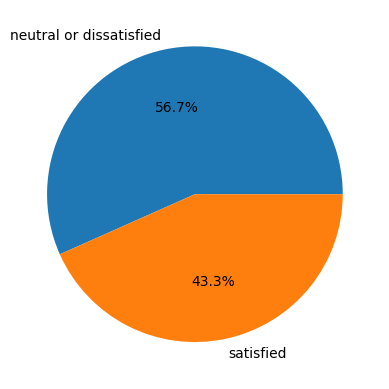

In [ ]:
satisfed_counts = train_data['satisfaction'].value_counts()
plt.pie(satisfed_counts, labels=satisfed_counts.index, autopct='%1.1f%%')

plt.show()

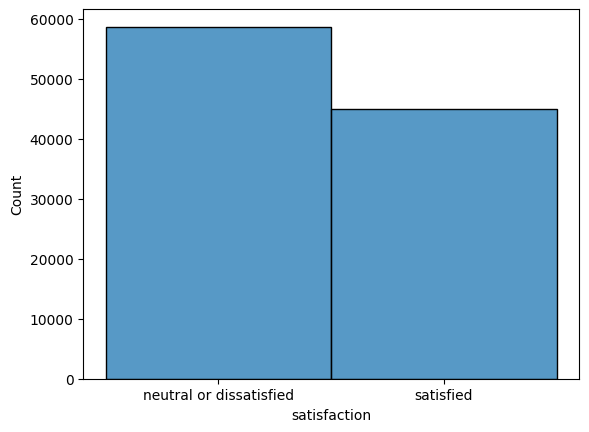

In [ ]:
sns.histplot(train_data['satisfaction'], bins=2)

plt.show()

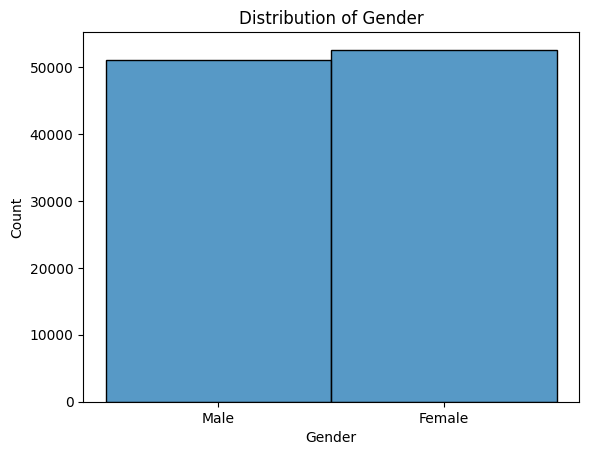

In [ ]:
sns.histplot(train_data['Gender'], bins=2)
plt.title('Distribution of Gender')
plt.show()

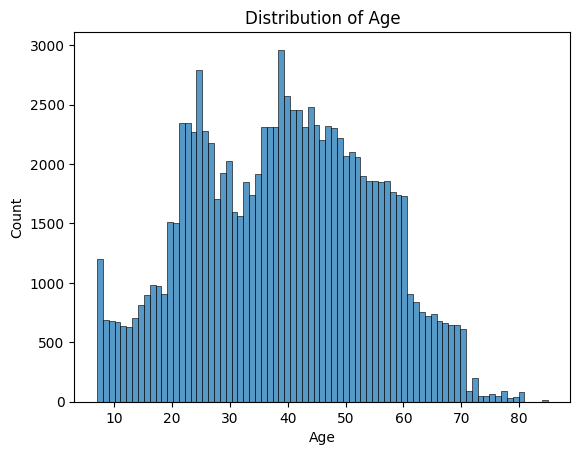

In [ ]:
sns.histplot(train_data['Age'])
plt.title('Distribution of Age')
plt.show()

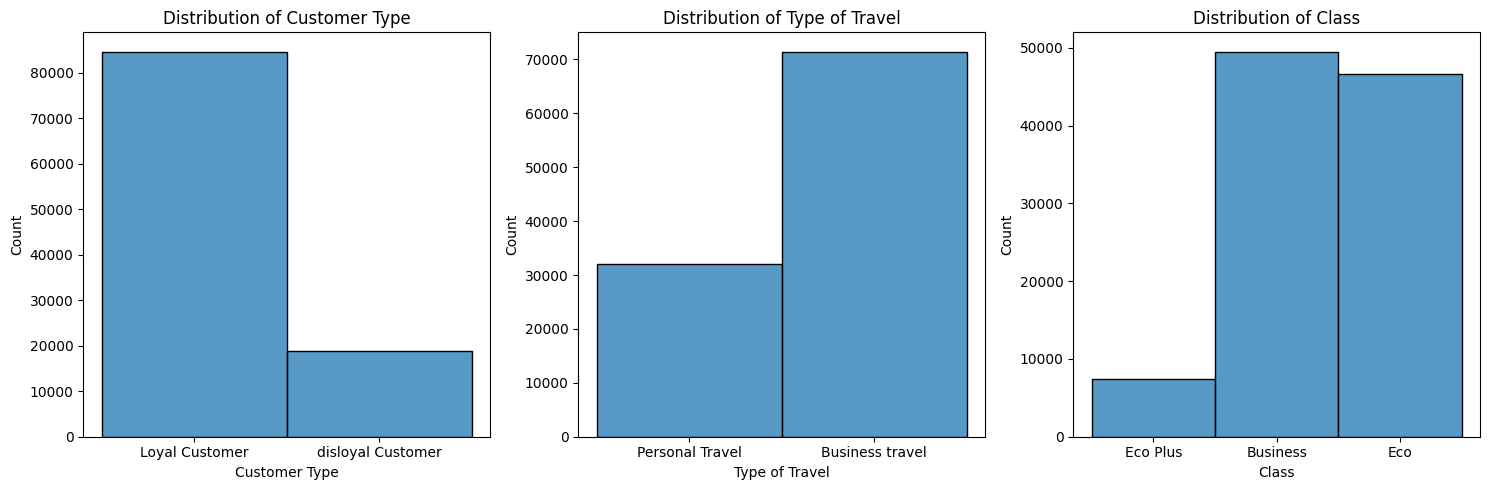

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
# colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
for col, ax  in zip(customer_info,ax.flat):
  sns.histplot(data = train_data, x = col, ax= ax, palette= 'coolwarm')
  ax.set_title(f'Distribution of {col}')
plt.tight_layout();

NOTE:
- Số lượng Khách hàng Nam và Nữ không chênh lệch nhiều
- Độ tuổi của Khách Hàng tập trung chính ở khoảng 20 - 60 tuổi
- Gần 80% Khách hàng thuộc nhóm Khách Hàng trung thành (Loyal Customer)
- Gần 70% Khách Hàng bay vì lý do công tác (Business Travel)
- Vé máy bay tập trung chính ở 2 hạng thương gia và tiết kiệm

Text(0.5, 1.0, 'Distribution of Flight Distance')

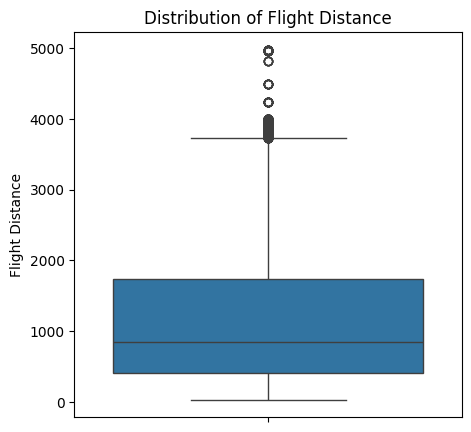

In [ ]:
plt.figure(figsize = (5,5))
sns.boxplot(data=train_data,y="Flight Distance")
plt.title('Distribution of Flight Distance')

Text(0.5, 1.0, 'Distribution of Flight Distance')

<Figure size 500x500 with 0 Axes>

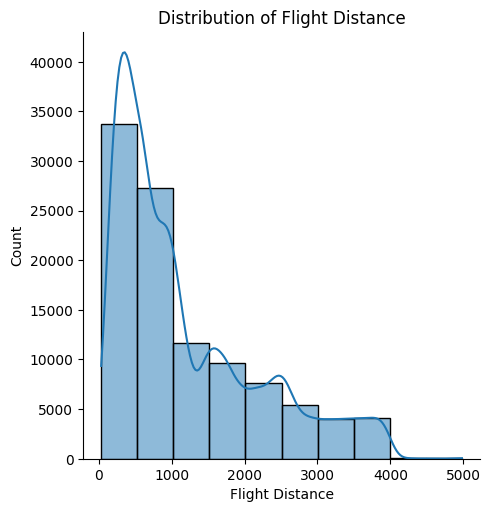

In [ ]:
# fig, ax = plt.subplots(1,3, figsize = (25,10))
# # colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
# for col, ax, color  in zip(flight_info,ax.flat,colors):
#   sns.histplot(data = train_data, x = col, ax= ax, palette= 'coolwarm', bins=6)
#   ax.set_title(f'Distribution of {col}')
# # plt.tight_layout();
plt.figure(figsize = (5,5))
sns.displot(data=train_data,x="Flight Distance",bins=10, kde = True)
plt.title('Distribution of Flight Distance')

<Axes: xlabel='satisfaction', ylabel='Flight Distance'>

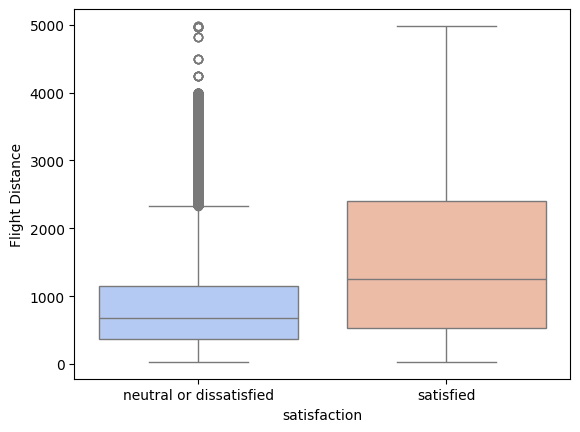

In [ ]:
sns.boxplot(x = "satisfaction", y = "Flight Distance", palette = "coolwarm", data = train_data)


<Axes: xlabel='Flight Distance', ylabel='Count'>

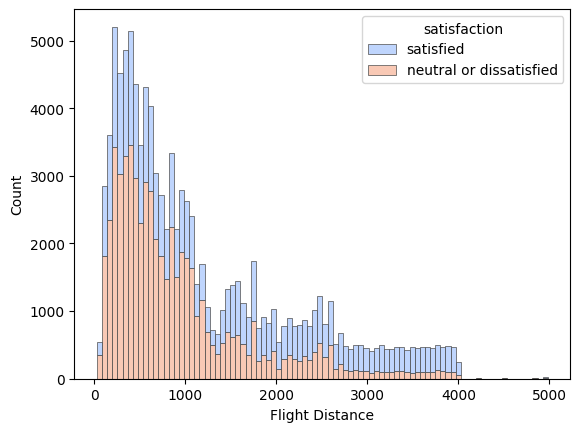

In [ ]:
sns.histplot(train_data.sort_values('Class', ascending=True), x = "Flight Distance", hue = "satisfaction", multiple = "stack", palette = "coolwarm", edgecolor = ".3", linewidth = .5)


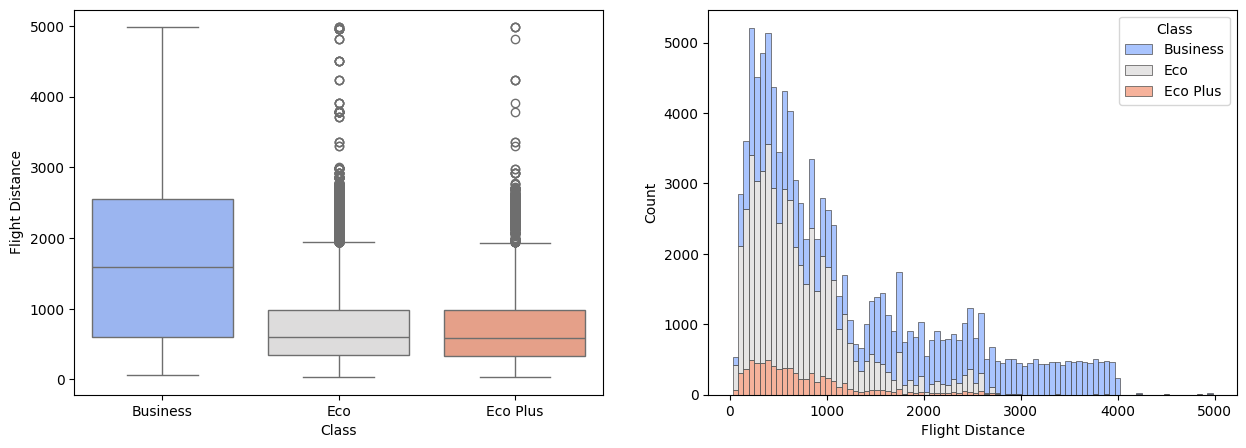

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "coolwarm", data = train_data.sort_values('Class', ascending=True), ax = ax[0])
sns.histplot(train_data.sort_values('Class', ascending=True), x = "Flight Distance", hue = "Class", multiple = "stack", palette = "coolwarm", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

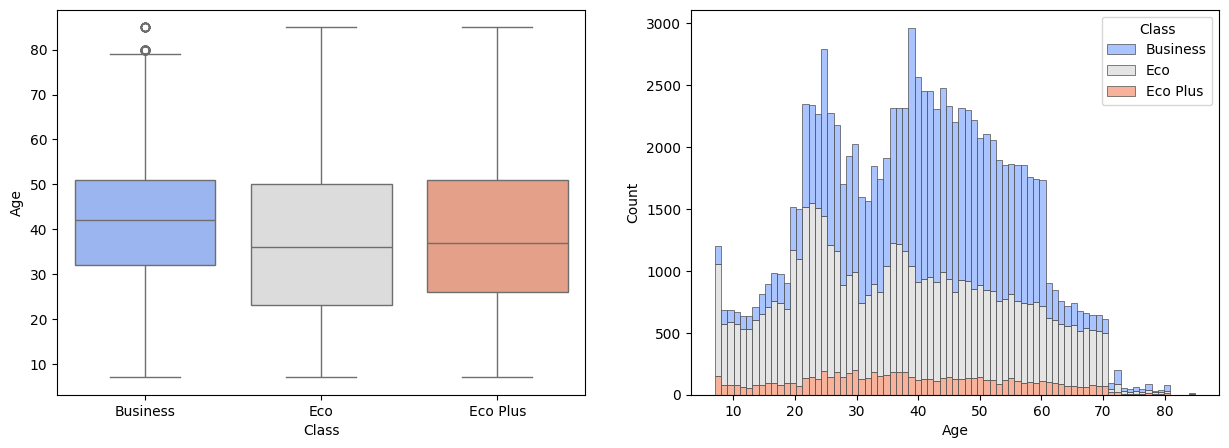

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "coolwarm", data = train_data.sort_values('Class', ascending=True), ax = ax[0])
sns.histplot(train_data.sort_values('Class', ascending=True), x = "Age", hue = "Class", multiple = "stack", palette = "coolwarm", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Text(0.5, 1.0, 'Distribution of Departure & Arrival Delay in Minutes')

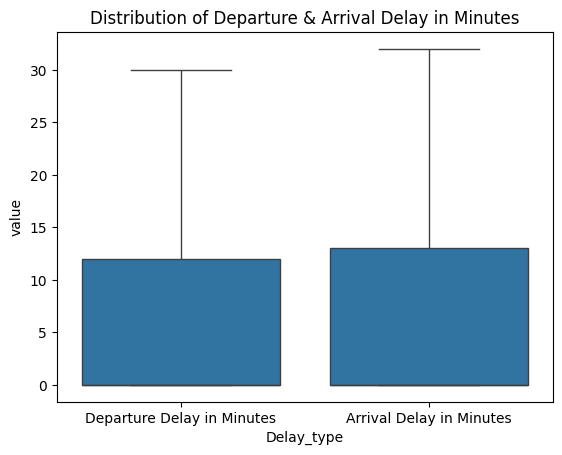

In [ ]:
# fig, ax = plt.subplots(1,2, figsize = (10,5))

# sns.boxplot(data=train_data,y='Departure Delay in Minutes',showfliers = False, ax = ax[0])
# # plt.title('Distribution of Departure Delay in Minutes')

# sns.histplot(data=train_data,x= 'Arrival Delay in Minutes', ax=ax[1])
delay = train_data[['id','Departure Delay in Minutes',"Arrival Delay in Minutes"]].set_index(["id"]).stack().reset_index();
delay.columns = ['id', 'Delay_type', 'value']
sns.boxplot(data=delay,y='value',x='Delay_type',showfliers = False)
# sns.boxplot(data=train_data,y="Arrival Delay in Minutes",showfliers = False)
plt.title('Distribution of Departure & Arrival Delay in Minutes')


In [ ]:
train_data['Departure Delay in Minutes'].value_counts()

Departure Delay in Minutes
0      58552
1       2939
2       2266
3       2006
4       1845
       ...  
426        1
465        1
321        1
692        1
337        1
Name: count, Length: 445, dtype: int64

NOTE:
- Đa số các chuyến bay có độ dài < 1000 miles
- Thời gián delay lúc khới hành và lúc hạ cách có điểm tương đồng : đều tập trung trong khoảng 120 phút ~ 2 tiếng

In [ ]:
df = train_data[['id','Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Departure/Arrival time convenient', 'Food and drink',
       'Online boarding', 'Cleanliness', 'Checkin service',
       'Leg room service', 'Inflight entertainment', 'On-board service',
       'Seat comfort', 'Baggage handling', 'Inflight service']].set_index(["id"]).stack().reset_index();
df.columns = ['id', 'Services', 'value']

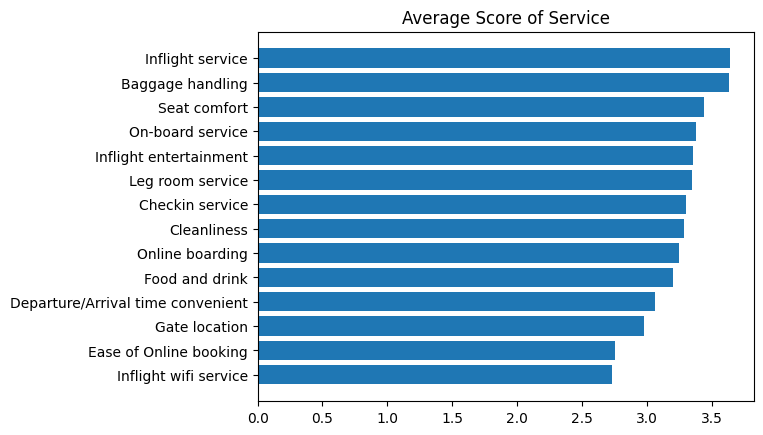

In [ ]:
# Sort Services có điểm trung bình từ thấp đến cao
df_avg = df.groupby(['Services']).agg(avg_scoring = ('value','mean')).reset_index()
df_avg = df_avg.sort_values('avg_scoring')
plt.barh(y = df_avg['Services'], width = df_avg['avg_scoring']) # Added width argument
plt.title('Average Score of Service');

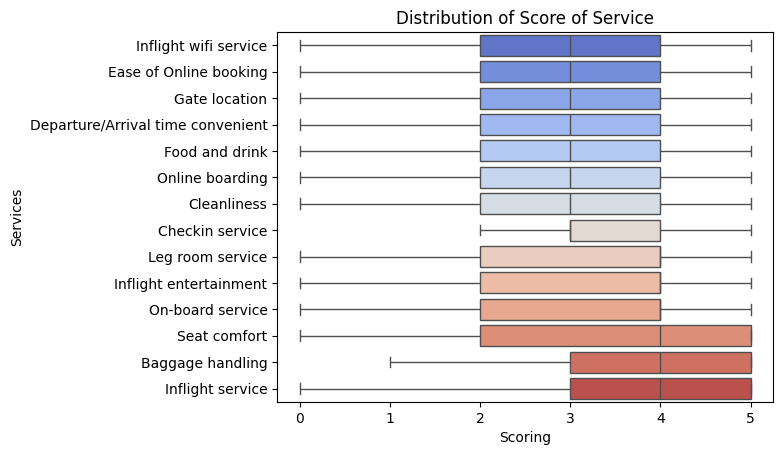

In [ ]:
df.columns = ['id', 'Services', 'Scoring']
sns.boxplot(data=df,x='Scoring', y='Services', showfliers = False , palette= 'coolwarm')
plt.title('Distribution of Score of Service');

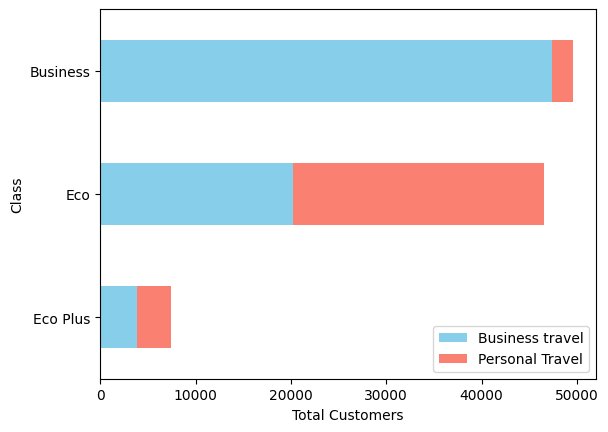

In [ ]:
pv_class_travel = pd.pivot_table(train_data, values='id', index='Class', columns='Type of Travel', aggfunc='count', fill_value=0).reset_index()
pv_class_travel = pv_class_travel.sort_values('Business travel', ascending=True)
pv_class_travel.set_index('Class').plot(kind ='barh', stacked = True, color=['skyblue', 'salmon'])

plt.legend(bbox_to_anchor=(1, 0), loc='lower right')
plt.ylabel('Class')
plt.xlabel('Total Customers')
# plt.title('Satisfied Customer per Class')

# Show the plot
plt.xticks(rotation = 0)

plt.show();

<Figure size 1000x500 with 0 Axes>

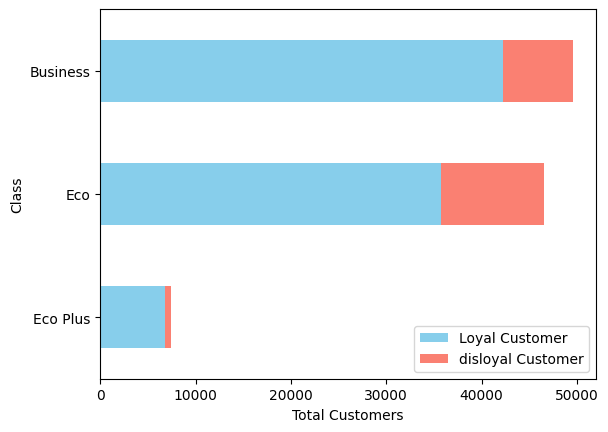

In [ ]:
plt.figure(figsize = (10,5))
pv_class_cs = pd.pivot_table(train_data, values='id', index='Class', columns='Customer Type', aggfunc='count', fill_value=0).reset_index()
pv_class_cs = pv_class_cs.sort_values('Loyal Customer', ascending=True)
pv_class_cs.set_index('Class').plot(kind ='barh', stacked = True, color=['skyblue', 'salmon'])

plt.legend(bbox_to_anchor=(1, 0), loc='lower right')
plt.ylabel('Class')
plt.xlabel('Total Customers')
# plt.title('Satisfied Customer per Class')

# Show the plot
plt.xticks(rotation = 0)

plt.show();

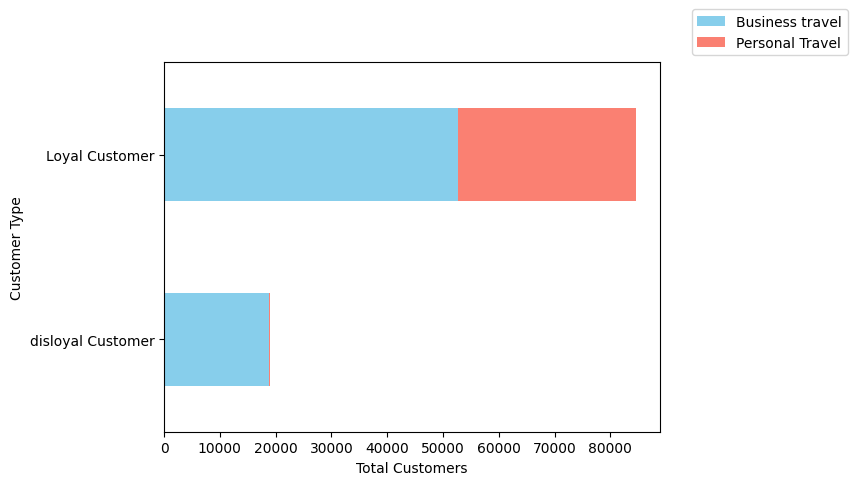

In [ ]:
pv_cus_travel = pd.pivot_table(train_data, values='id', index='Customer Type', columns='Type of Travel', aggfunc='count', fill_value=0).reset_index()
pv_cus_travel = pv_cus_travel.sort_values('Business travel', ascending=True)
pv_cus_travel.set_index('Customer Type').plot(kind ='barh', stacked = True, color=['skyblue', 'salmon'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='lower left')
plt.ylabel('Customer Type')
plt.xlabel('Total Customers')
# plt.title('Satisfied Customer per Class')

# Show the plot
plt.xticks(rotation = 0)

plt.show();

In [ ]:
train_data_cate = train_data.copy()
def conver_category(df,features):
  for col_name in features:
    df[col_name] = df[col_name].astype('category')

conver_category(train_data_cate,score)


In [ ]:
train_data_cate.describe(include = 'category')

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103594,103594,103594,103594,103594,103594,103594,103594,103594,103594,103594,103594,103594,103594
unique,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,25789,25474,24370,28489,24294,30671,31682,29335,30773,28704,37274,28975,37846,27100


NOTE
- 3 dịch vụ tệ nhất : Inflight wifi service, Ease of Online booking, Gate location: 50% đánh giá 3 điểm

- 3 dịch vụ tốt nhất : Seat comfort, Baggage handling	, Inflight service: 50% đánh giá 4 -5 điểm

### Relationship

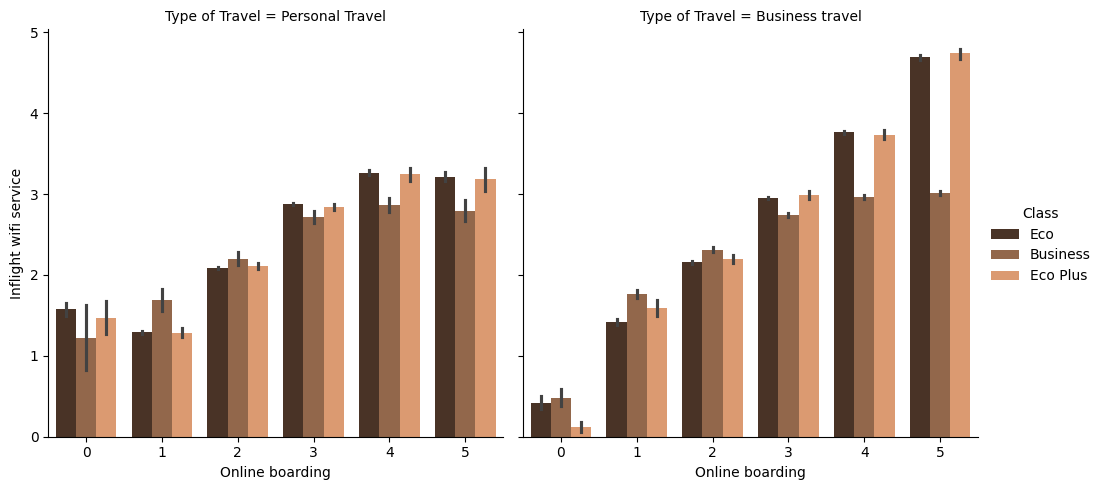

In [ ]:
sns.catplot(x = 'Online boarding',
            y = 'Inflight wifi service',
            hue = 'Class',
            col = 'Type of Travel',
            kind = 'bar', palette = 'copper',
            data = train_data)
plt.show()

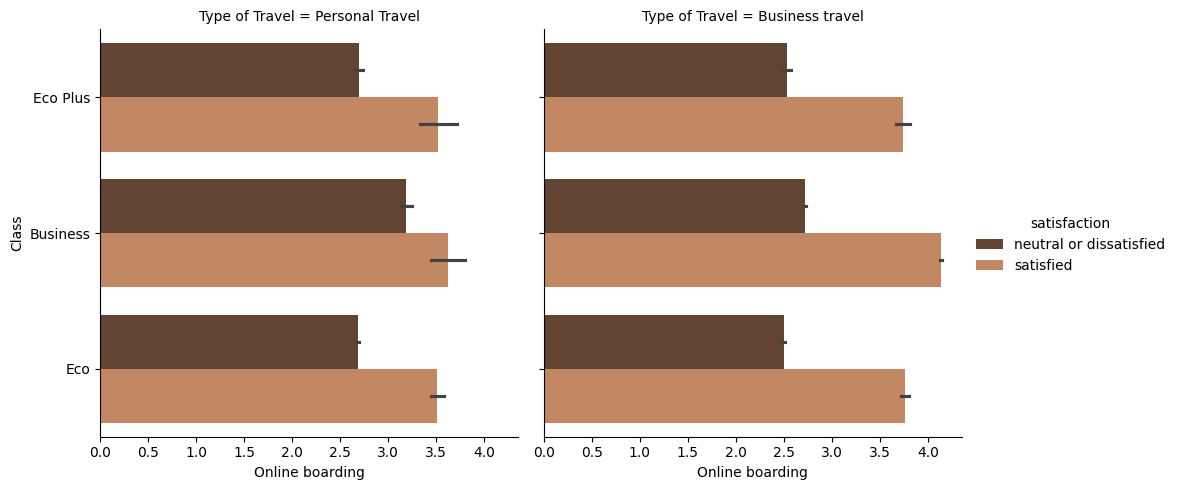

In [ ]:
sns.catplot(x = 'Online boarding',
            y = 'Class',
            hue = 'satisfaction',
            col = 'Type of Travel',
            kind = 'bar', palette = 'copper',
            data = train_data)
plt.show()

In [ ]:
train_data['Total_score'] = train_data[score].sum(axis = 1).round(1)

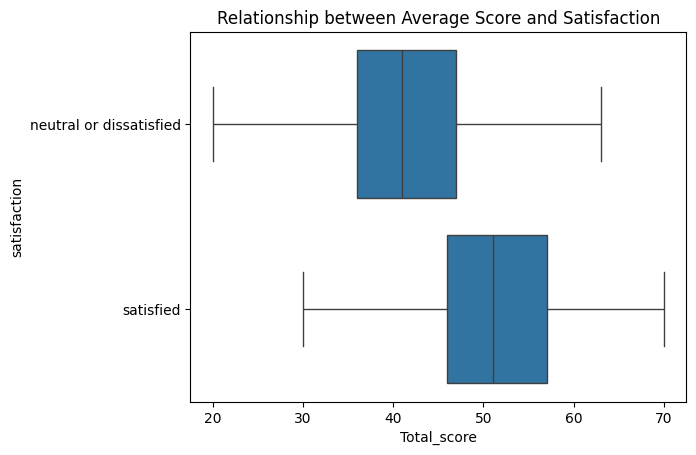

In [ ]:
sns.boxplot(data=train_data,x='Total_score', y='satisfaction', showfliers = False)
plt.title(f'Relationship between Average Score and Satisfaction');

(0.0, 120.0)

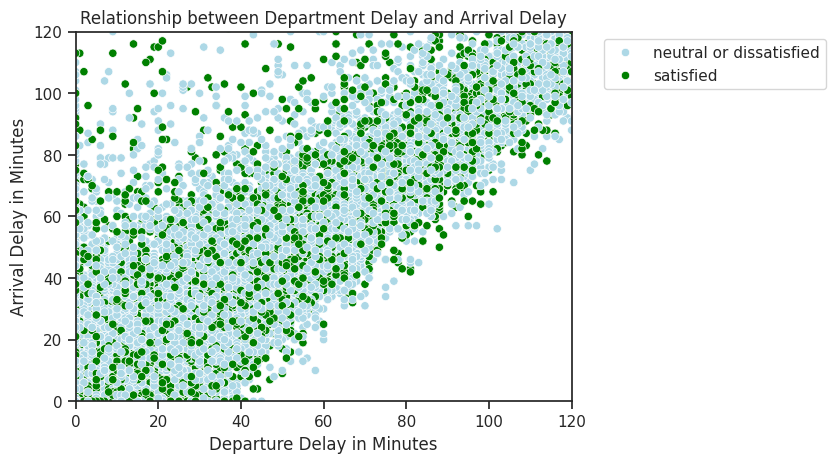

In [ ]:
palette = {'satisfied': 'green', 'neutral or dissatisfied': 'lightblue'}
sns.scatterplot(data=train_data,x='Departure Delay in Minutes',y='Arrival Delay in Minutes', hue = 'satisfaction', palette=palette)
plt.title(f'Relationship between Department Delay and Arrival Delay')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0,120)
plt.ylim(0,120)


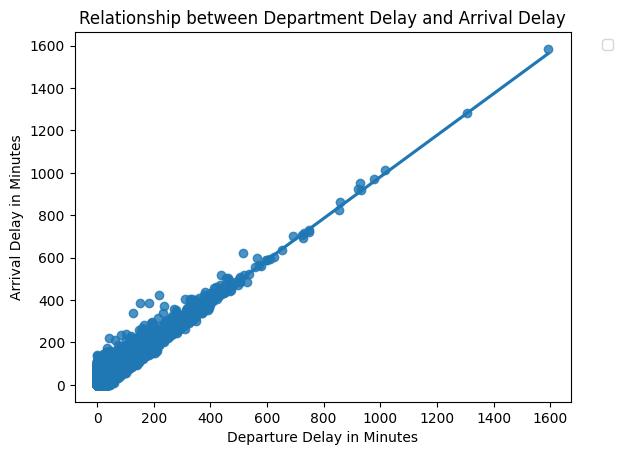

In [ ]:
sns.regplot(data=train_data,x='Departure Delay in Minutes',y='Arrival Delay in Minutes')
plt.title(f'Relationship between Department Delay and Arrival Delay')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

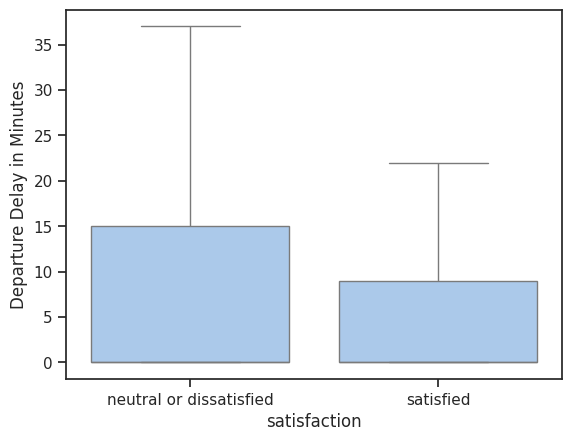

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="satisfaction", y="Departure Delay in Minutes", data=train_data, showfliers =False);

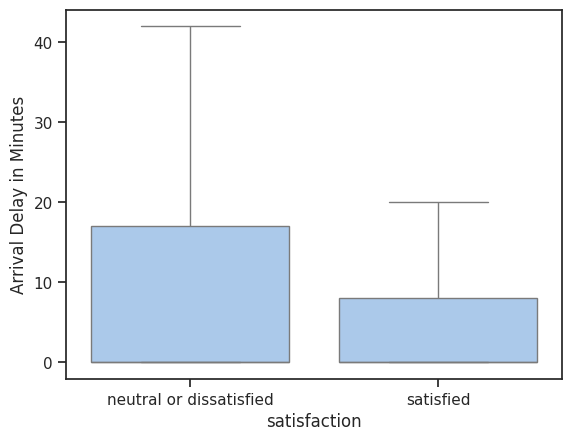

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

sns.boxplot(x="satisfaction", y="Arrival Delay in Minutes", data=train_data,showfliers=False);

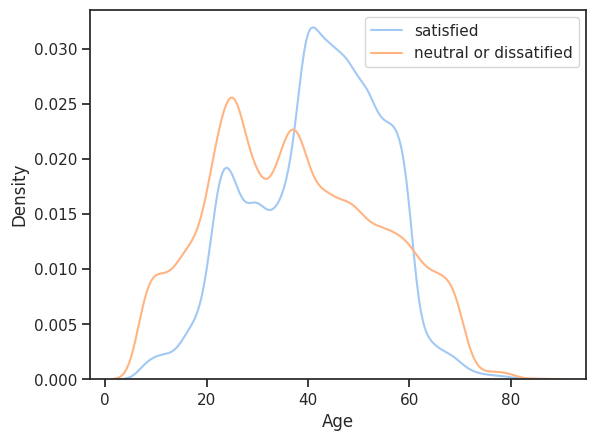

In [ ]:
sns.kdeplot(x='Age', data=train_data[train_data['satisfaction'] == 'satisfied'], label='satisfied')
sns.kdeplot(x='Age', data=train_data[train_data['satisfaction'] == 'neutral or dissatisfied'], label='neutral or dissatified')
plt.legend()
# plt.title('Satisfied Customer per Class')

In [ ]:
train_data['Age_group'] = pd.cut(train_data['Age'], bins=[1,20,40,60,80,100])
age = train_data[['id','Age_group','Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Departure/Arrival time convenient', 'Food and drink',
       'Online boarding', 'Cleanliness', 'Checkin service',
       'Leg room service', 'Inflight entertainment', 'On-board service',
       'Seat comfort', 'Baggage handling', 'Inflight service']].set_index(["id",'Age_group']).stack().reset_index();
age.columns = ['id','Age_group', 'Services', 'value']


pva = pd.pivot_table(age, values='value', index='Services', columns='Age_group', aggfunc='mean', fill_value=0).reset_index()
# pva = pva.sort_values('satisfied', ascending=True)
# pva.set_index('Services').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon', 'green', 'orange', 'purple'])
# pva.set_index('value').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon'])
pva.round(1)

Age_group,Services,"(1, 20]","(20, 40]","(40, 60]","(60, 80]","(80, 100]"
0,Baggage handling,3.7,3.7,3.7,3.3,3.2
1,Checkin service,3.2,3.2,3.4,3.2,3.4
2,Cleanliness,3.1,3.2,3.4,3.1,3.4
3,Departure/Arrival time convenient,3.3,2.9,3.1,3.4,2.9
4,Ease of Online booking,2.6,2.7,2.8,2.6,3.3
5,Food and drink,3.1,3.2,3.3,3.1,3.0
6,Gate location,3.0,3.0,3.0,2.9,3.2
7,Inflight entertainment,3.1,3.3,3.6,3.1,3.0
8,Inflight service,3.7,3.7,3.7,3.3,2.2
9,Inflight wifi service,2.6,2.7,2.8,2.6,2.6


In [ ]:
classs = train_data[['id','Class','Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Departure/Arrival time convenient', 'Food and drink',
       'Online boarding', 'Cleanliness', 'Checkin service',
       'Leg room service', 'Inflight entertainment', 'On-board service',
       'Seat comfort', 'Baggage handling', 'Inflight service']].set_index(["id",'Class']).stack().reset_index();
classs.columns = ['id','Class', 'Services', 'value']


classs = pd.pivot_table(classs, values='value', index='Services', columns='Class', aggfunc='mean', fill_value=0).reset_index()
# pva = pva.sort_values('satisfied', ascending=True)
# pva.set_index('Services').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon', 'green', 'orange', 'purple'])
# pva.set_index('value').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon'])
classs.round(1)

Class,Services,Business,Eco,Eco Plus
0,Baggage handling,3.8,3.5,3.4
1,Checkin service,3.5,3.1,3.0
2,Cleanliness,3.5,3.1,3.1
3,Departure/Arrival time convenient,2.9,3.2,3.2
4,Ease of Online booking,2.9,2.6,2.7
5,Food and drink,3.3,3.1,3.1
6,Gate location,3.0,3.0,3.0
7,Inflight entertainment,3.6,3.1,3.1
8,Inflight service,3.8,3.5,3.4
9,Inflight wifi service,2.8,2.7,2.8


In [ ]:
train_data['distance'] = pd.cut(train_data['Flight Distance'], bins=[1,1000,2000,3000,4000])
distance = train_data[['id','distance','Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Departure/Arrival time convenient', 'Food and drink',
       'Online boarding', 'Cleanliness', 'Checkin service',
       'Leg room service', 'Inflight entertainment', 'On-board service',
       'Seat comfort', 'Baggage handling', 'Inflight service']].set_index(["id",'distance']).stack().reset_index();
distance.columns = ['id','distance', 'Services', 'value']


distance = pd.pivot_table(distance, values='value', index='Services', columns='distance', aggfunc='mean', fill_value=0).reset_index()
# pva = pva.sort_values('satisfied', ascending=True)
# pva.set_index('Services').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon', 'green', 'orange', 'purple'])
# pva.set_index('value').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon'])
distance.round(1)

distance,Services,"(1, 1000]","(1000, 2000]","(2000, 3000]","(3000, 4000]"
0,Baggage handling,3.6,3.6,3.7,3.8
1,Checkin service,3.2,3.4,3.4,3.5
2,Cleanliness,3.2,3.3,3.5,3.6
3,Departure/Arrival time convenient,3.1,3.1,3.0,2.9
4,Ease of Online booking,2.7,2.8,2.9,2.9
5,Food and drink,3.1,3.2,3.3,3.4
6,Gate location,3.0,3.0,3.0,3.0
7,Inflight entertainment,3.2,3.4,3.6,3.8
8,Inflight service,3.6,3.7,3.7,3.8
9,Inflight wifi service,2.7,2.8,2.7,2.7


In [ ]:
# # plt.figure(figsize = (15,10))
# x = sns.FacetGrid(train_data, col = 'satisfaction', height=5)
# x.map(sns.distplot, 'Age', bins = 7,kde =True);

NOTE: Khách Hàng không hài lòng với chuyến bay thường tập trung ở dđộ tuổi 20-30 tuổi
-  Khách Hàng không hài lòng với chuyến bay thường tập trung ở 40-50 tuổi

In [ ]:
# a = train_data.groupby(['satisfaction','Class']).agg(Total_customer = ('id','count')).reset_index()
# a_sorted = a.sort_values('Total_customer', ascending=True)
# sns.barplot(data =a_sorted, x = 'Class', y = 'Total_customer', hue = 'satisfaction')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title(f'Relationship between Class and Satisfaction');

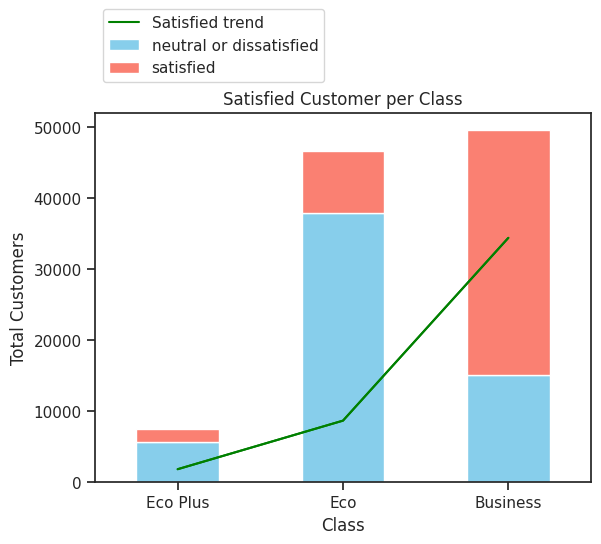

In [ ]:
pv = pivot_table = pd.pivot_table(train_data, values='id', index='Class', columns='satisfaction', aggfunc='count', fill_value=0).reset_index()
pv = pv.sort_values('satisfied', ascending=True)
pv.set_index('Class').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon'])
satisfied_rate = train_data[train_data['satisfaction'] == 'satisfied'].groupby('Class')['id'].count().sort_values(ascending=True)
plt.plot(satisfied_rate.index, satisfied_rate.values, color = 'green')

plt.plot(satisfied_rate.index, satisfied_rate.values, color = 'green', label='Satisfied trend')
plt.legend(bbox_to_anchor=(0, 1.3), loc='upper left')
plt.xlabel('Class')
plt.ylabel('Total Customers')
plt.title('Satisfied Customer per Class')

# Show the plot
plt.xticks(rotation = 0)

plt.show();


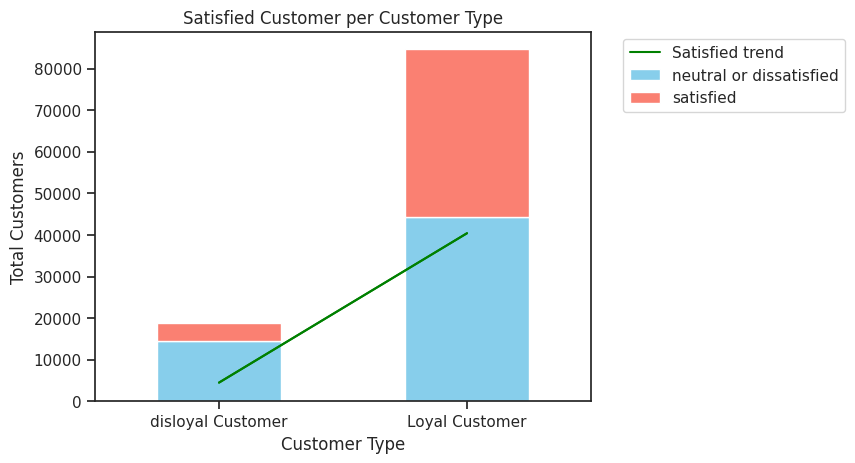

In [ ]:
pv_cus = pivot_table = pd.pivot_table(train_data, values='id', index='Customer Type', columns='satisfaction', aggfunc='count', fill_value=0).reset_index()
pv_cus = pv_cus.sort_values('satisfied', ascending=True)
pv_cus.set_index('Customer Type').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon'])

satisfied_rate_cs = train_data[train_data['satisfaction'] == 'satisfied'].groupby('Customer Type')['id'].count().sort_values(ascending=True)
plt.plot(satisfied_rate_cs.index, satisfied_rate_cs.values, color = 'green')

plt.plot(satisfied_rate_cs.index, satisfied_rate_cs.values, color = 'green', label='Satisfied trend')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Customer Type')
plt.ylabel('Total Customers')
plt.title('Satisfied Customer per Customer Type')

# Show the plot
plt.xticks(rotation = 0)
plt.show();

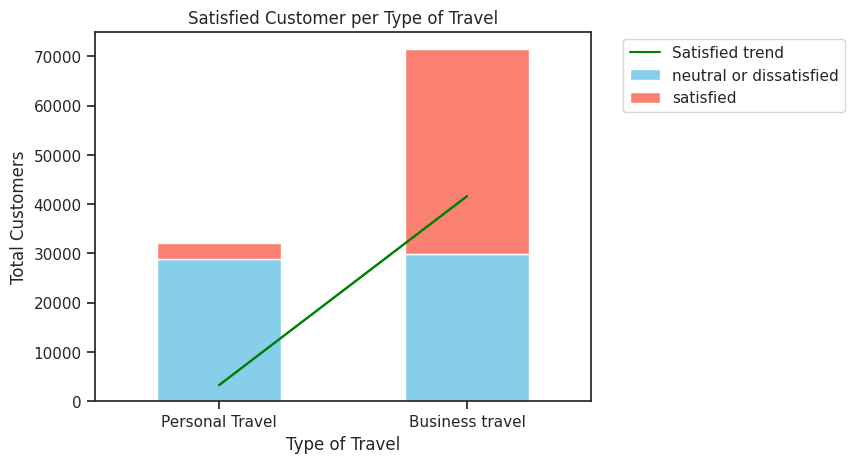

In [ ]:
pv_travel = pivot_table = pd.pivot_table(train_data, values='id', index='Type of Travel', columns='satisfaction', aggfunc='count', fill_value=0).reset_index()
pv_travel = pv_travel.sort_values('satisfied', ascending=True)
pv_travel.set_index('Type of Travel').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon'])

satisfied_rate_tr = train_data[train_data['satisfaction'] == 'satisfied'].groupby('Type of Travel')['id'].count().sort_values(ascending=True)
plt.plot(satisfied_rate_tr.index, satisfied_rate_tr.values, color = 'green')

plt.plot(satisfied_rate_tr.index, satisfied_rate_tr.values, color = 'green', label='Satisfied trend')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Type of Travel')
plt.ylabel('Total Customers')
plt.title('Satisfied Customer per Type of Travel')

# Show the plot
plt.xticks(rotation = 0)
plt.show();

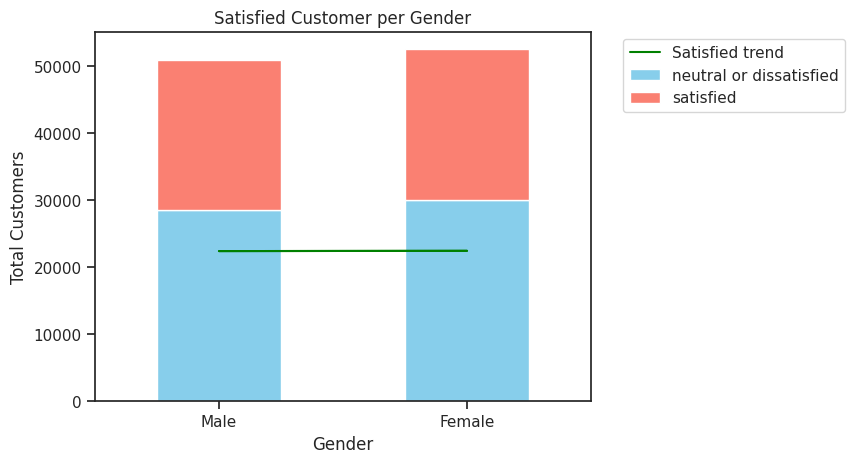

In [ ]:
pv_gen = pivot_table = pd.pivot_table(train_data, values='id', index='Gender', columns='satisfaction', aggfunc='count', fill_value=0).reset_index()
pv_gen = pv_gen.sort_values('satisfied', ascending=True)
pv_gen.set_index('Gender').plot(kind ='bar', stacked = True, color=['skyblue', 'salmon'])

satisfied_rate_gen = train_data[train_data['satisfaction'] == 'satisfied'].groupby('Gender')['id'].count().sort_values(ascending=True)
plt.plot(satisfied_rate_gen.index, satisfied_rate_gen.values, color = 'green')

plt.plot(satisfied_rate_gen.index, satisfied_rate_gen.values, color = 'green', label='Satisfied trend')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Gender')
plt.ylabel('Total Customers')
plt.title('Satisfied Customer per Gender')

# Show the plot
plt.xticks(rotation = 0)
plt.show();

In [ ]:
# b = train_data.groupby(['satisfaction','Type of Travel']).agg(Total_customer = ('id','count')).reset_index()
# b_sorted = b.sort_values('Total_customer', ascending=True)
# sns.barplot(data =b_sorted, x = 'Type of Travel', y = 'Total_customer', hue = 'satisfaction')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title(f'Relationship between Type of Travel and Satisfaction')


In [ ]:
# c = train_data.groupby(['satisfaction','Customer Type']).agg(Total_customer = ('id','count')).reset_index()
# c_sorted = c.sort_values('Total_customer', ascending=True)
# sns.barplot(data =c_sorted, x = 'Customer Type', y = 'Total_customer', hue = 'satisfaction')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title(f'Relationship between Customer Type and Satisfaction');

NOTE:
- Thời gian dealy khi khỏi hành và thời gian delay khi hạnh cánh có mối quan hệ tuyến tính, khởi hành trễ x phút --> thời gian hạ cánh trễ x phút
- Tỷ lệ Khách Hàng hài lòng ở hạng thương gia nhiều hơn tỷ lệ Khách Hàng hài lòng ở hạng ghế tiêt kiệm (Eco)
- Khách Hàng đi công tác thường có xu hướng hài lòng với chuyến bay nhiều hơn
- Tỷ lệ Khách hàng trung thành hài lòng với chuyến bay cao hơn Khách hàng vãng lai

--> Hãng bay cần tập trung cải thiện các dịch cho các KH gắn bó lâu năm, sử dụng dịch vụ cao cấp


In [ ]:
d = train_data[['id','Class','Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Departure/Arrival time convenient', 'Food and drink',
       'Online boarding', 'Cleanliness', 'Checkin service',
       'Leg room service', 'Inflight entertainment', 'On-board service',
       'Seat comfort', 'Baggage handling', 'Inflight service']].set_index(["id",'Class']).stack().reset_index();
d.columns = ['id','Class', 'Services', 'value']
d.head(10)

,id,Class,Services,value
0,70172,Eco Plus,Inflight wifi service,3
1,70172,Eco Plus,Ease of Online booking,3
2,70172,Eco Plus,Gate location,1
3,70172,Eco Plus,Departure/Arrival time convenient,4
4,70172,Eco Plus,Food and drink,5
5,70172,Eco Plus,Online boarding,3
6,70172,Eco Plus,Cleanliness,5
7,70172,Eco Plus,Checkin service,4
8,70172,Eco Plus,Leg room service,3
9,70172,Eco Plus,Inflight entertainment,5


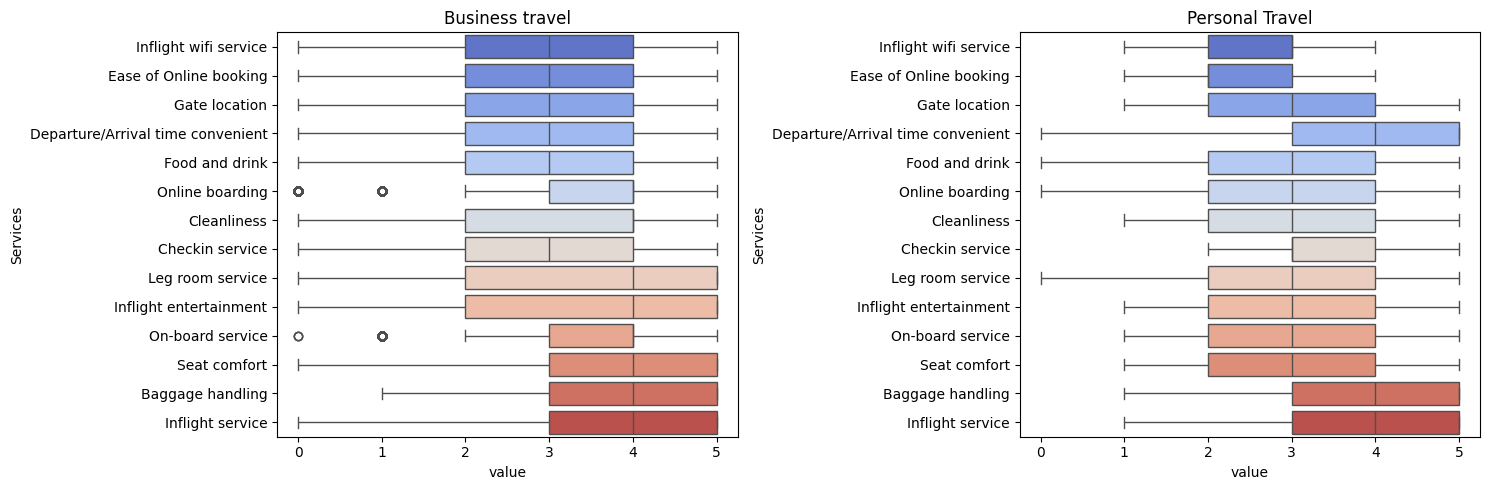

In [ ]:
e = train_data[['id','Type of Travel','Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Departure/Arrival time convenient', 'Food and drink',
       'Online boarding', 'Cleanliness', 'Checkin service',
       'Leg room service', 'Inflight entertainment', 'On-board service',
       'Seat comfort', 'Baggage handling', 'Inflight service']].set_index(["id",'Type of Travel']).stack().reset_index();
e.columns = ['id','Type of Travel', 'Services', 'value']


Business = e[e['Type of Travel'] == 'Business travel']
Eco = e[e['Type of Travel'] == 'Personal Travel']
# Eco_plus = e[e['Class'] == 'Eco Plus']

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(data=Business,x='value', y='Services' , palette= 'coolwarm', ax=ax[0])
ax[0].set_title('Business travel')
sns.boxplot(data=Eco,x='value', y='Services', showfliers = False , palette= 'coolwarm', ax= ax[1])
ax[1].set_title('Personal Travel')
plt.tight_layout()
# sns.boxplot(data=Eco_plus,x='value', y='Services', showfliers = False , palette= 'coolwarm', ax= ax[2])
# ax[2].set_title('Eco_plus')
# plt.tight_layout();

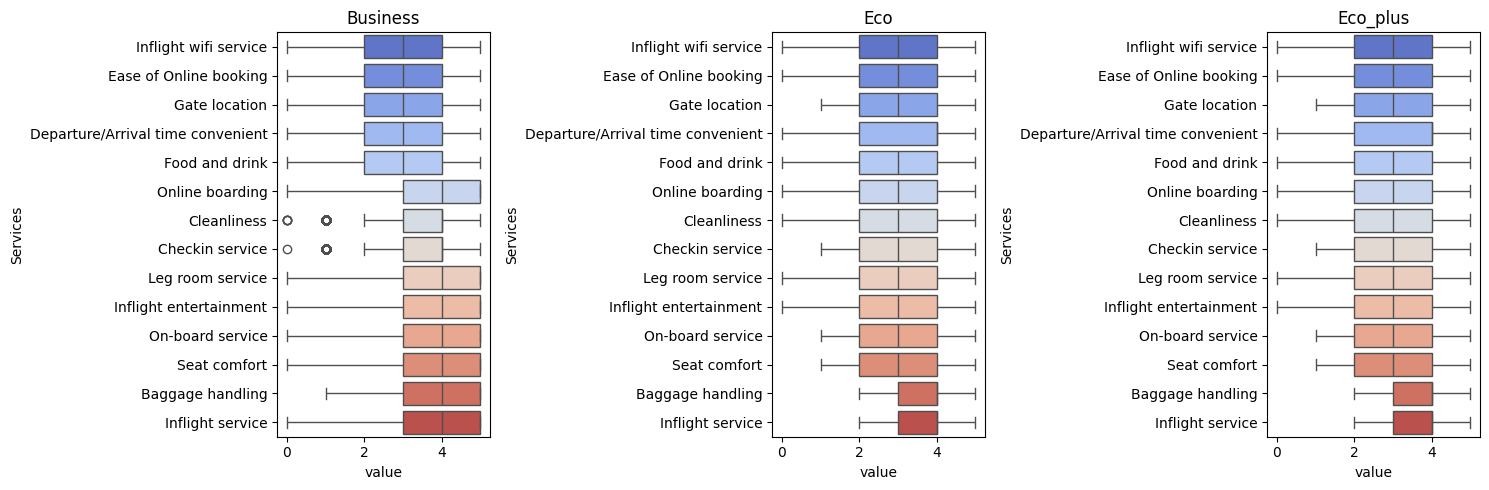

In [ ]:
e = train_data[['id','Class','Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Departure/Arrival time convenient', 'Food and drink',
       'Online boarding', 'Cleanliness', 'Checkin service',
       'Leg room service', 'Inflight entertainment', 'On-board service',
       'Seat comfort', 'Baggage handling', 'Inflight service']].set_index(["id",'Class']).stack().reset_index();
e.columns = ['id','Class', 'Services', 'value']


Business = e[e['Class'] == 'Business']
Eco = e[e['Class'] == 'Eco']
Eco_plus = e[e['Class'] == 'Eco Plus']

fig, ax = plt.subplots(1,3, figsize = (15,5))
sns.boxplot(data=Business,x='value', y='Services' , palette= 'coolwarm', ax=ax[0])
ax[0].set_title('Business')
sns.boxplot(data=Eco,x='value', y='Services', showfliers = False , palette= 'coolwarm', ax= ax[1])
ax[1].set_title('Eco')
plt.tight_layout()
sns.boxplot(data=Eco_plus,x='value', y='Services', showfliers = False , palette= 'coolwarm', ax= ax[2])
ax[2].set_title('Eco_plus')
plt.tight_layout();

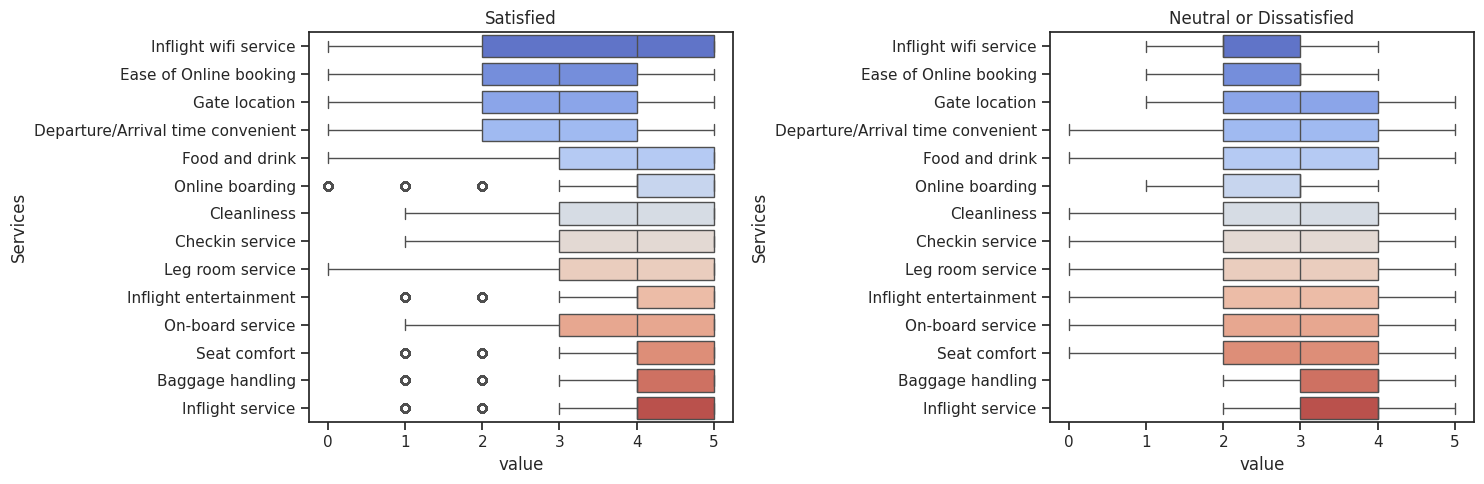

In [ ]:
e = train_data[['id','satisfaction','Inflight wifi service', 'Ease of Online booking', 'Gate location',
       'Departure/Arrival time convenient', 'Food and drink',
       'Online boarding', 'Cleanliness', 'Checkin service',
       'Leg room service', 'Inflight entertainment', 'On-board service',
       'Seat comfort', 'Baggage handling', 'Inflight service']].set_index(["id",'satisfaction']).stack().reset_index();
e.columns = ['id','satisfaction', 'Services', 'value']


satisfied_data = e[e['satisfaction'] == 'satisfied']
unsatisfied_data = e[e['satisfaction'] == 'neutral or dissatisfied']

fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.boxplot(data=satisfied_data,x='value', y='Services' , palette= 'coolwarm', ax=ax[0])
ax[0].set_title('Satisfied')
sns.boxplot(data=unsatisfied_data,x='value', y='Services', showfliers = False , palette= 'coolwarm', ax= ax[1])
ax[1].set_title('Neutral or Dissatisfied')
plt.tight_layout();

In [ ]:
# data_corr = train_data.drop(['id','Total_score'],axis =1)
# # data_corr = train_data.select_dtypes(exclude = 'object').corr()
# plt.figure(figsize = (25,15))
# sns.heatmap(data_corr.select_dtypes(exclude = 'object').corr(), annot = True, cmap = 'coolwarm',fmt=".2f")

In [ ]:
train_data.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total_score', 'Age_group', 'distance'],
      dtype='object')

In [ ]:
procedure_service = ['Ease of Online booking','Gate location','Online boarding','Baggage handling','Checkin service']
inflight_service = ['Inflight entertainment','On-board service', 'Inflight service','Inflight wifi service','Departure/Arrival time convenient','Food and drink']
seat = ['Cleanliness','Leg room service','Seat comfort']

In [ ]:
all_ser = procedure_service + inflight_service + seat
service_corr = train_data[all_ser].corr()


In [ ]:
ones_corr = np.ones_like(service_corr, dtype = bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_service_corr = service_corr.iloc[1:, :-1]

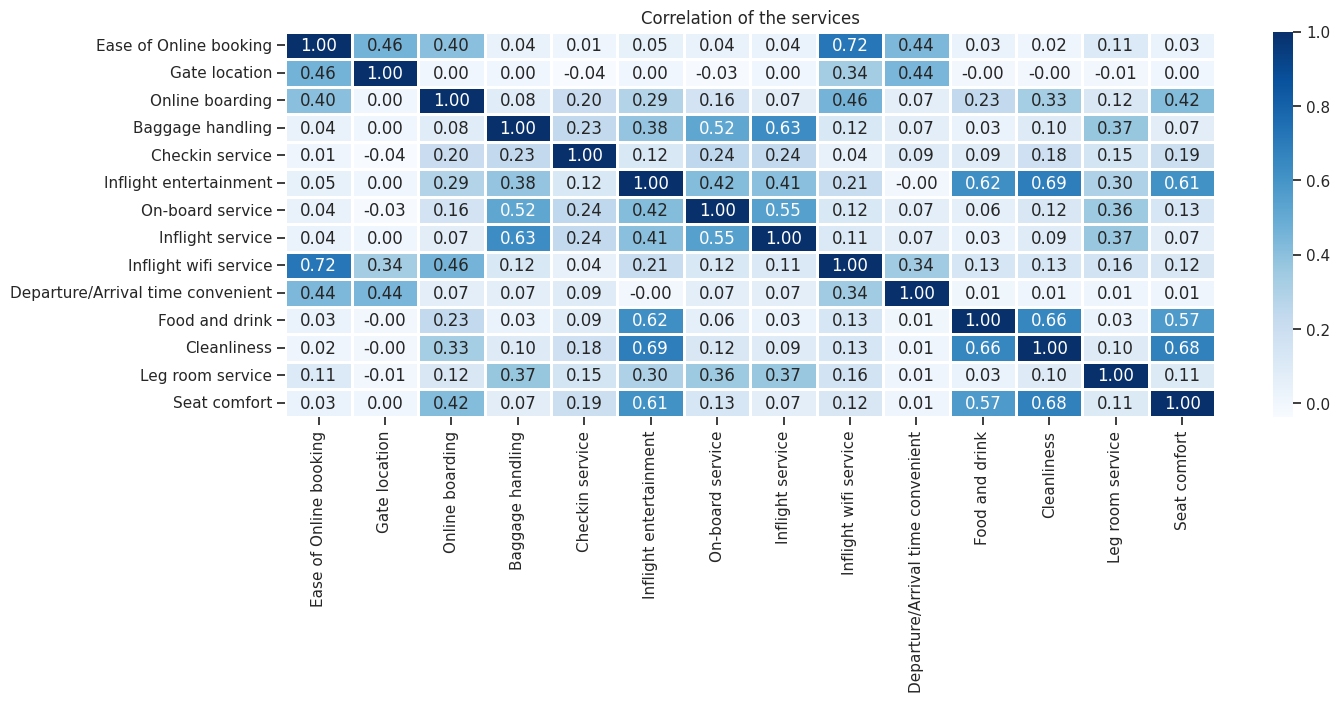

In [ ]:
# all_ser = procedure_service + inflight_service + seat
ones_corr = np.ones_like(service_corr, dtype = bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_service_corr = service_corr.iloc[1:, :-1]

plt.figure(figsize = (15,5))

sns.heatmap(service_corr, annot = True, cmap = 'Blues',fmt=".2f",linewidths=1, linecolor='white')
plt.xticks(rotation = 90)
plt.title("Correlation of the services");

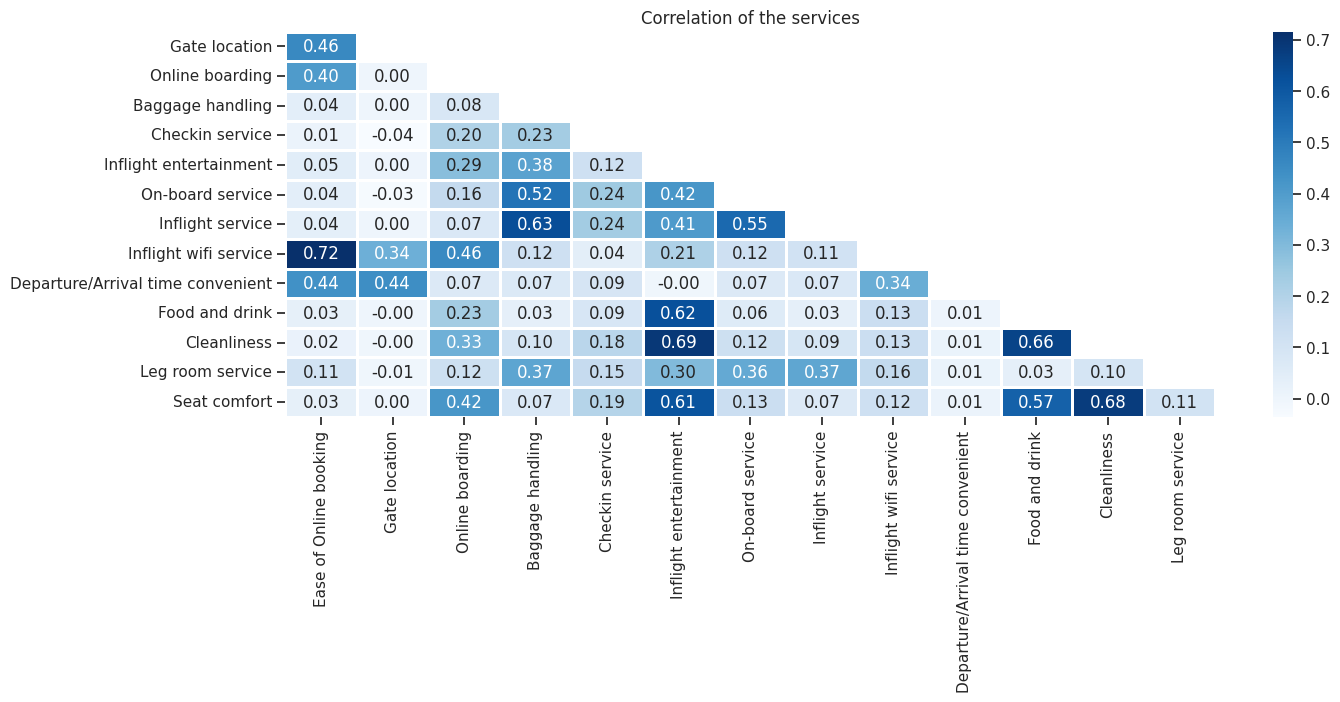

In [ ]:
# all_ser = procedure_service + inflight_service + seat
plt.figure(figsize = (15,5))

sns.heatmap(adjusted_service_corr,mask = adjusted_mask, annot = True, cmap = 'Blues',fmt=".2f",linewidths=1, linecolor='white')
plt.xticks(rotation = 90)
plt.title("Correlation of the services");

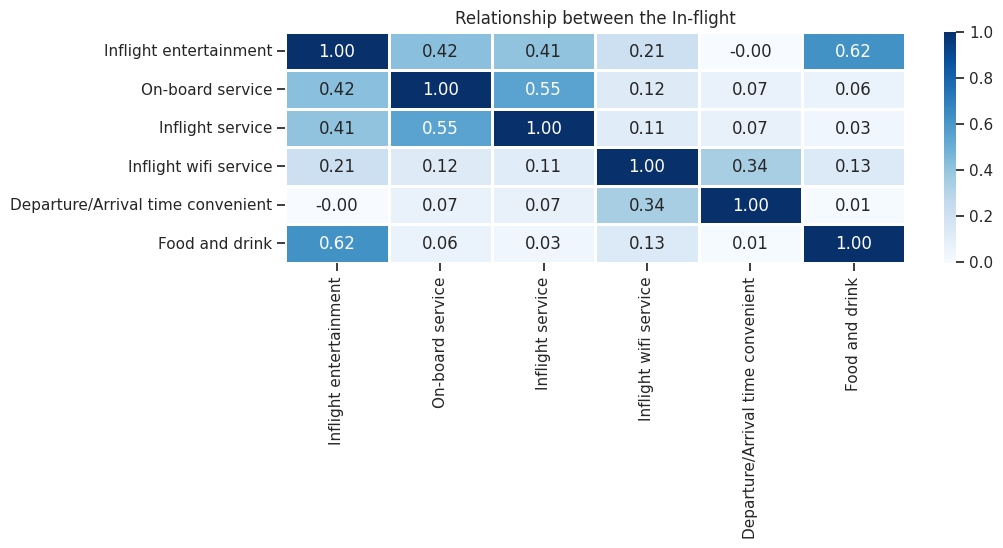

In [ ]:
flicol = inflight_service.copy()
# flicol.extend(['satisfaction'])

plt.figure(figsize = (10,3))
sns.heatmap(train_data[inflight_service].corr(), annot = True, cmap = 'Blues',fmt=".2f",linewidths=1, linecolor='white')
plt.xticks(rotation = 90)
plt.title("Relationship between the In-flight");

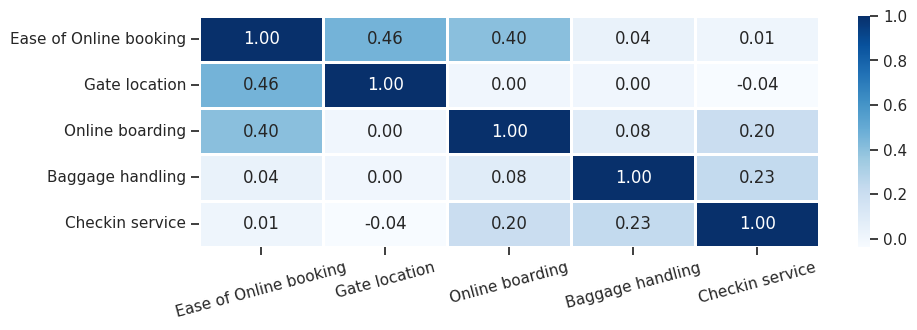

In [ ]:
procol = procedure_service.copy()
procol.extend(['satisfaction'])
plt.figure(figsize = (10,3))
sns.heatmap(train_data[procedure_service].corr(), annot = True, cmap = 'Blues',fmt=".2f",linewidths=1, linecolor='white')
plt.xticks(rotation = 15);

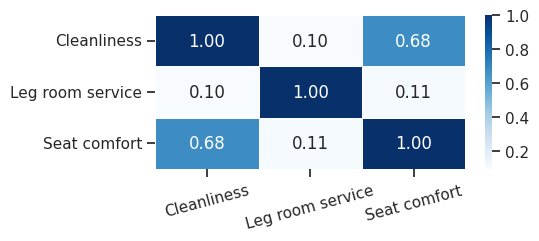

In [ ]:
seatcol = seat.copy()
# flicol.extend(['satisfaction'])
plt.figure(figsize = (5,2))
sns.heatmap(train_data[seatcol].corr(), annot = True, cmap = 'Blues',fmt=".2f",linewidths=0.5, linecolor='white')
plt.yticks(rotation = 0)
plt.xticks(rotation = 15);

In [ ]:
# sns.pairplot(train_data, hue='Class', vars=seatcol)

In [ ]:
# sns.pairplot(train_data, hue='Class', vars=procedure_service)

## MODEL FITTING

## Endcoding

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103594 non-null  int64   
 1   Gender                             103594 non-null  object  
 2   Customer Type                      103594 non-null  object  
 3   Age                                103594 non-null  int64   
 4   Type of Travel                     103594 non-null  object  
 5   Class                              103594 non-null  object  
 6   Flight Distance                    103594 non-null  int64   
 7   Inflight wifi service              103594 non-null  int64   
 8   Departure/Arrival time convenient  103594 non-null  int64   
 9   Ease of Online booking             103594 non-null  int64   
 10  Gate location                      103594 non-null  int64   
 11  Food and drink            

In [ ]:
df_train = train_data.drop(['id','Total_score','Age_group','distance'],axis =1).copy()
df_test = test_data.drop(['id'],axis =1).copy()


In [ ]:
print('table train')
df_train.info()

table train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103594 entries, 0 to 103593
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding            

In [ ]:
df_test.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    14528
satisfied                  11365
Name: count, dtype: int64

In [ ]:
## create function convert object to numberic

def label_encode(df):
  df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
  df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})
  df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':2})
  df['Type of Travel'] = df['Type of Travel'].map({'Business travel':1,'Personal Travel':2})
  df['Class'] = df['Class'].map({'Eco':1,'Eco Plus':2,'Business':3})
  return df
# ## Encoding for train table
# label_encode(df_train)

# ## Encoding for test table
# label_encode(df_test)

In [ ]:
label_encode(df_train)
# label_encode(df_test)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,2,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,0,2,25,1,3,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,3,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,3,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103589,1,2,23,1,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103590,0,1,49,1,3,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103591,0,2,30,1,3,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103592,1,2,22,1,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [ ]:
for col in ['Gender','satisfaction','Customer Type','Type of Travel','Class']:
  print(df_train[col].value_counts())
  print('===========')

Gender
1    52576
0    51018
Name: count, dtype: int64
satisfaction
0    58697
1    44897
Name: count, dtype: int64
Customer Type
1    84662
2    18932
Name: count, dtype: int64
Type of Travel
1    71465
2    32129
Name: count, dtype: int64
Class
3    49533
1    46593
2     7468
Name: count, dtype: int64


In [ ]:
label_encode(df_test)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,3,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
2,0,2,20,1,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,3,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25888,0,2,34,1,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
25889,0,1,23,1,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
25890,1,1,17,2,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
25891,0,1,14,1,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


In [ ]:
for col in ['Gender','satisfaction','Customer Type','Type of Travel','Class']:
  print(df_test[col].value_counts())
  print(col)
  print('===========')

Gender
1    13127
0    12766
Name: count, dtype: int64
Gender
satisfaction
0    14528
1    11365
Name: count, dtype: int64
satisfaction
Customer Type
1    21111
2     4782
Name: count, dtype: int64
Customer Type
Type of Travel
1    17980
2     7913
Name: count, dtype: int64
Type of Travel
Class
3    12457
1    11524
2     1912
Name: count, dtype: int64
Class


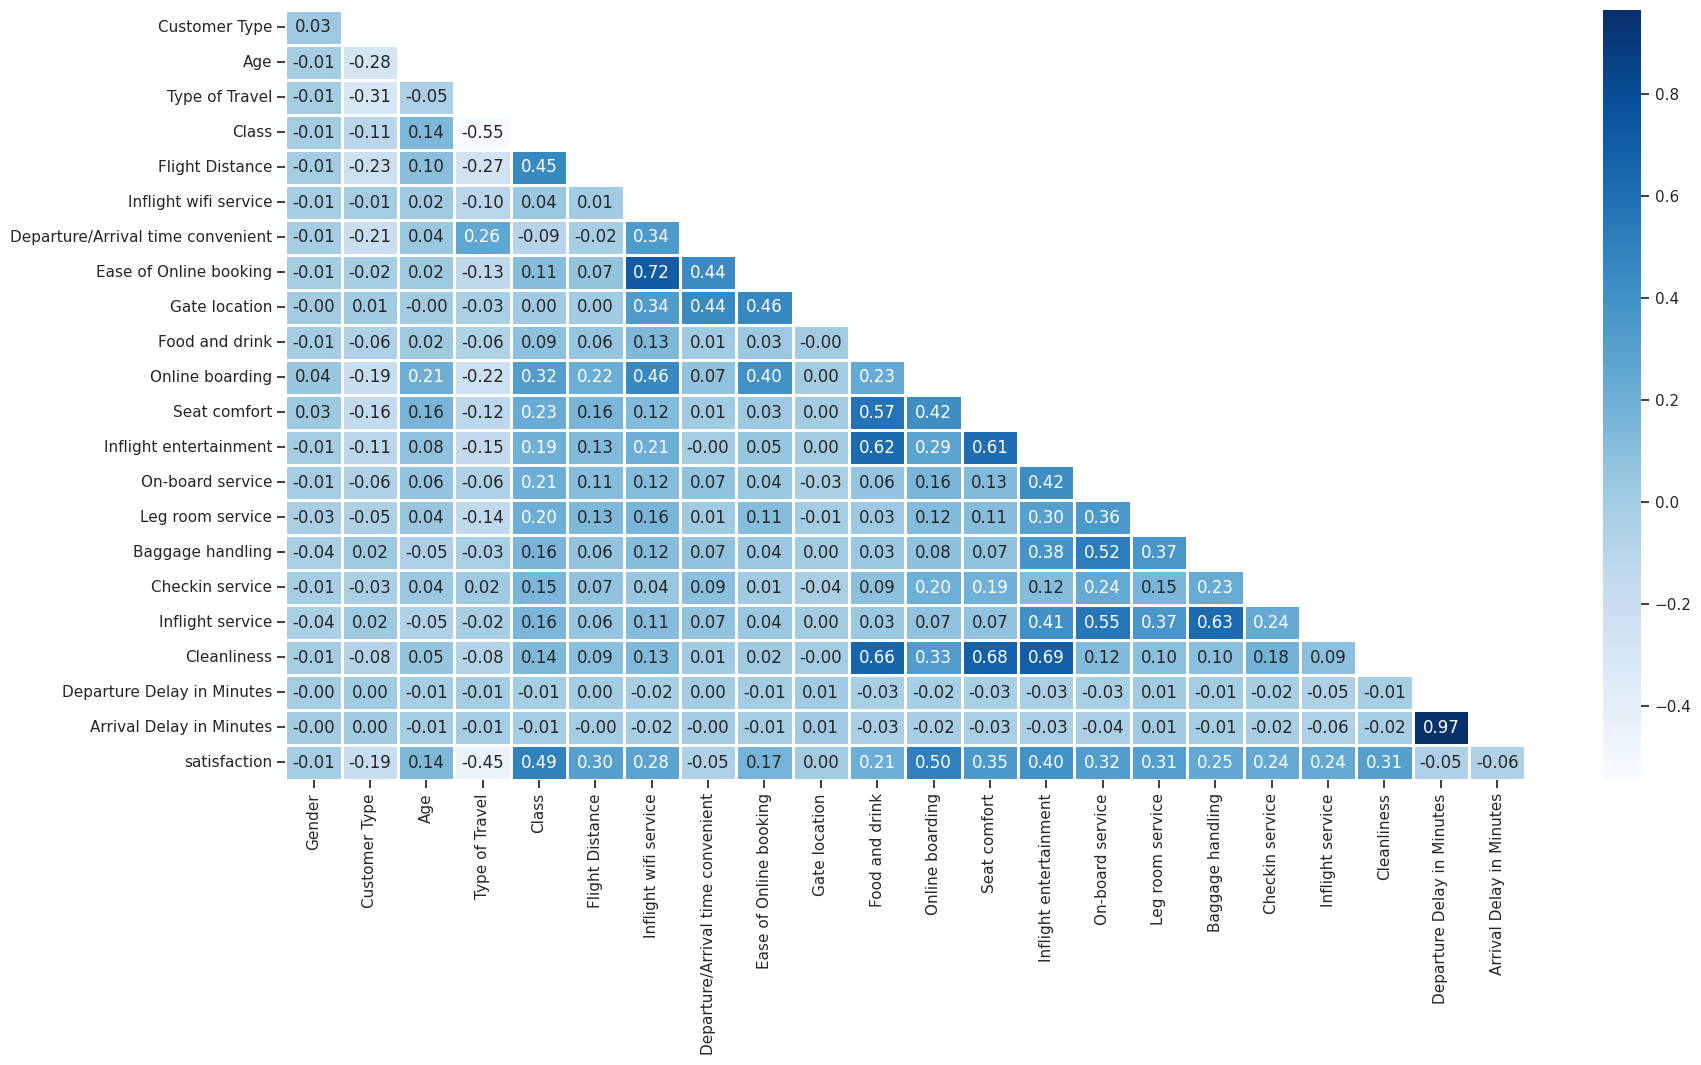

In [ ]:
cor = df_train.corr()
ones_corr = np.ones_like(cor, dtype = bool)
mask = np.triu(ones_corr)

# Adjust both the mask and the correlation matrix
adjusted_mask = mask[1:, :-1]
adjusted_cor = cor.iloc[1:, :-1]  # Slice the correlation matrix as well

plt.figure(figsize = (20,10))

# Use the adjusted correlation matrix for the heatmap
sns.heatmap(adjusted_cor, mask=adjusted_mask, annot=True, cmap='Blues', fmt=".2f", linewidths=1, linecolor='white')
plt.xticks(rotation = 90);
# plt.title("Correlation of the features with satisfaction");

In [ ]:
# plt.figure(figsize = (20,10))

# sns.heatmap(df_train.corr(), annot = True, cmap = 'Blues',fmt=".2f",linewidths=1, linecolor='white')
# plt.xticks(rotation = 90)
# plt.title("Correlation of the services");

## Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# df_train_scaled = scaler.fit_transform(df_train) ##scaler.fit(df_train)
# df_test_scaled = scaler.transform(df_test) ##= scaler.transform(df_test)

# df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns, index = df_train.index)
# df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test.columns, index = df_test.index)


## Imbalance data

In [ ]:
## Gán biến data train
X_train = df_train.drop(['satisfaction'],axis =1)
y_train = df_train['satisfaction']

## Split data train
from sklearn.model_selection import train_test_split
X_train, X_test1, y_train, y_test1 = train_test_split(X_train,y_train, test_size=0.2, random_state=42)


## Gán biến data test
X_test = df_test.drop(['satisfaction'],axis =1)
y_test = df_test['satisfaction']

## Resample data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
# X_train = df_train_scaled.drop(['satisfaction'],axis =1)
# y_train = df_train_scaled['satisfaction']

# X_test = df_test_scaled.drop(['satisfaction'],axis =1)
# y_test = df_test_scaled['satisfaction']

In [ ]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
cop = df_train.copy()
cop.satisfaction.astype('object')

0         0
1         0
2         1
3         0
4         1
         ..
103589    0
103590    1
103591    0
103592    0
103593    0
Name: satisfaction, Length: 103594, dtype: object

(array([58697., 44897.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

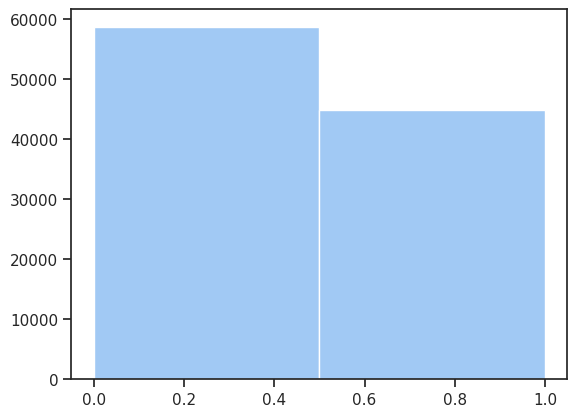

In [ ]:
plt.hist(data = cop, x = 'satisfaction', bins=2)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

## Model

In [ ]:
# Here are some algorithms that will be tested to determine the best model:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metric Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score


import xgboost as xgb
from xgboost import XGBClassifier

!pip install catboost
import catboost
from catboost import CatBoostClassifier



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

In [ ]:
## Predict với tập test được tách từ tập train
lg = LogisticRegression(random_state=0)
lg.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test1)
print(accuracy_score(y_test1,y_pred_lg))
print(classification_report(y_test1,y_pred_lg))

0.842801293498721
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     11655
           1       0.81      0.84      0.82      9064

    accuracy                           0.84     20719
   macro avg       0.84      0.84      0.84     20719
weighted avg       0.84      0.84      0.84     20719



In [ ]:
lg = LogisticRegression(random_state=0)
lg.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_lg))
print(classification_report(y_test,y_pred_lg))

0.8413857026995714
              precision    recall  f1-score   support

           0       0.87      0.84      0.86     14528
           1       0.81      0.84      0.82     11365

    accuracy                           0.84     25893
   macro avg       0.84      0.84      0.84     25893
weighted avg       0.84      0.84      0.84     25893



In [ ]:
# lg.margin_effect()

In [ ]:
# !pip install shap pandas scikit-learn



In [ ]:
# ## Explaining a non-additive boosted tree logistic regression model
# import shap

# # compute SHAP values
# explainer = shap.Explainer(lg.predict_proba, X_train)
# shap_values = explainer(X_test)

# # Convert feature names to a list for proper indexing
# feature_names = X_test.columns.tolist()  # Get feature names from DataFrame

# # set a display version of the data to use for plotting (has string values)
# shap.summary_plot(shap_values, X_test, feature_names=feature_names)


## Lựa chọn mô hình

In [ ]:
logistic = LogisticRegression(random_state=0)
bayes = GaussianNB()
knn = KNeighborsClassifier()
adaboost = AdaBoostClassifier(random_state=0)
randomForest = RandomForestClassifier(random_state=0)
dt = DecisionTreeClassifier(random_state=0)


modelList = {"Logistic Regression": logistic,
             "Naive Bayes": bayes,
             "KNN": knn,
             "AdaBoost": adaboost,
             "Random Forest": randomForest,
             "Decision Tree" : dt}




In [ ]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import f1_score

# scoring = ['precision_macro', 'recall_macro', 'f1_macro']

# for name_model, model in modelList.items():
#   print(f"Running model {name_model}")
#   scores = cross_validate(model, X_train, y_train, scoring=scoring, cv = 5)
#   print("F1 Score %0.2f accuracy with a standard deviation of %0.2f"
#         % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))
#   print("===============================================")

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

scoring = ['precision_macro', 'recall_macro', 'f1_macro']

for name_model, model in modelList.items():
  print(f"Running model {name_model}")
  scores = cross_validate(model, X_train, y_train, scoring=scoring, cv = 5)
  print("F1 Score %0.2f accuracy with a standard deviation of %0.2f"
        % (scores['test_f1_macro'].mean(), scores['test_f1_macro'].std()))
  print("===============================================")

Running model Logistic Regression
F1 Score 0.83 accuracy with a standard deviation of 0.01
Running model Naive Bayes
F1 Score 0.86 accuracy with a standard deviation of 0.00
Running model KNN
F1 Score 0.75 accuracy with a standard deviation of 0.02
Running model AdaBoost
F1 Score 0.92 accuracy with a standard deviation of 0.01
Running model Random Forest
F1 Score 0.96 accuracy with a standard deviation of 0.00
Running model Decision Tree
F1 Score 0.94 accuracy with a standard deviation of 0.01


In [ ]:
mx = pd.DataFrame()

for name_model, model in modelList.items():
  print(f"Running model {name_model}")
  model.fit(X_train, y_train)
  y_pred1 = model.predict(X_test1)
  y_pred = model.predict(X_test)

  data = {
    'Model': [name_model],
    'Training Data Accuracy': [round(accuracy_score(y_test1, y_pred1)*100,1)],
    'Testing Data Accuracy': [round(accuracy_score(y_test, y_pred)*100,1)]
          }
  df_acc = pd.DataFrame(data)


  mx = pd.concat([mx, df_acc], ignore_index=True)
mx


Running model Logistic Regression
Running model Naive Bayes
Running model KNN
Running model AdaBoost
Running model Random Forest
Running model Decision Tree


,Model,Training Data Accuracy,Testing Data Accuracy
0,Logistic Regression,84.3,84.1
1,Naive Bayes,86.0,86.0
2,KNN,73.6,72.7
3,AdaBoost,92.9,92.5
4,Random Forest,96.1,96.1
5,Decision Tree,94.3,94.2


In [ ]:
for name_model, model in modelList.items():
  print(f"Running model {name_model}")
  # scores = cross_validate(model, X_train, y_train, scoring=scoring, cv = 5)
  # print(accuracy_score(y_test,y_pred_lg))
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test1)
  print(f'Accurracy rate {accuracy_score(y_test1,y_pred)}')
  print('Classification_report:')
  print(classification_report(y_test1,y_pred))
  print("=============================================================")

Running model Logistic Regression
Accurracy rate 0.842801293498721
Classification_report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     11655
           1       0.81      0.84      0.82      9064

    accuracy                           0.84     20719
   macro avg       0.84      0.84      0.84     20719
weighted avg       0.84      0.84      0.84     20719

Running model Naive Bayes
Accurracy rate 0.8603697089627877
Classification_report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     11655
           1       0.85      0.82      0.84      9064

    accuracy                           0.86     20719
   macro avg       0.86      0.86      0.86     20719
weighted avg       0.86      0.86      0.86     20719

Running model KNN
Accurracy rate 0.7357015299966214
Classification_report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76

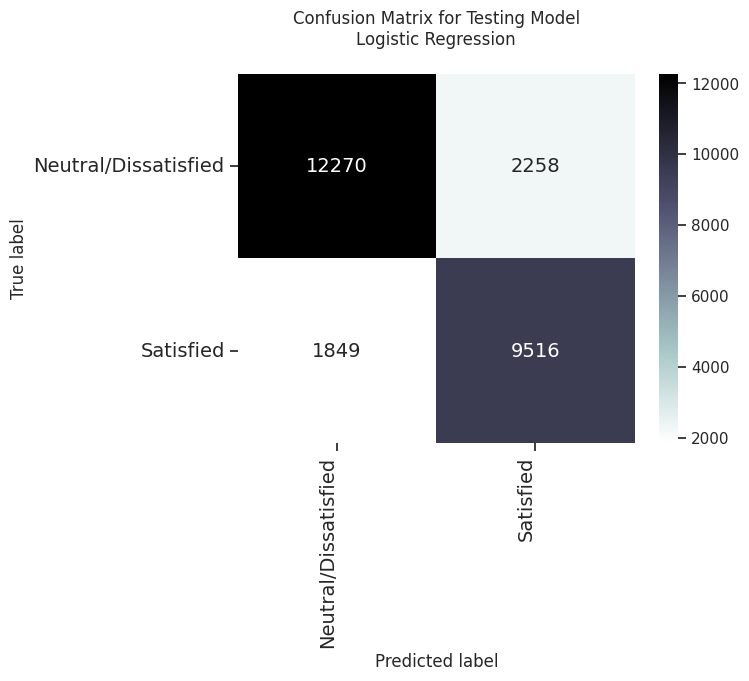

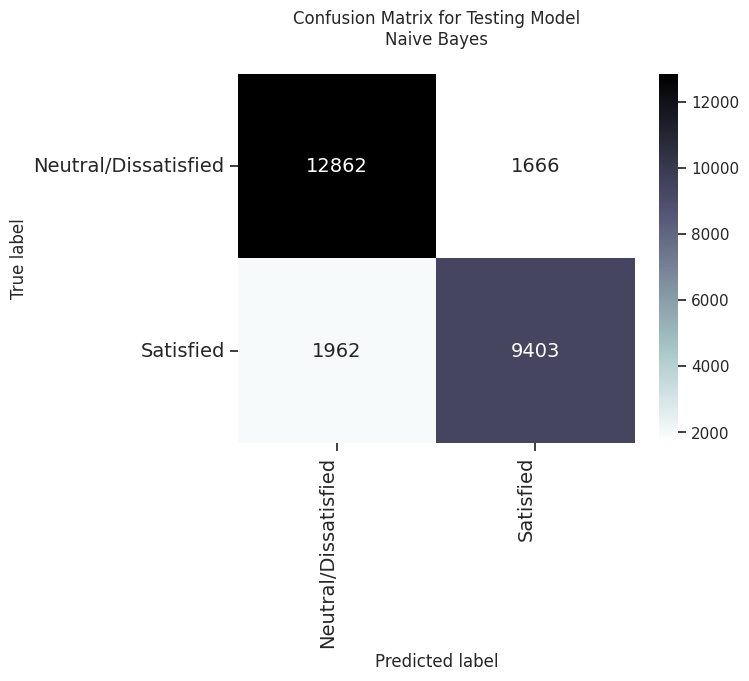

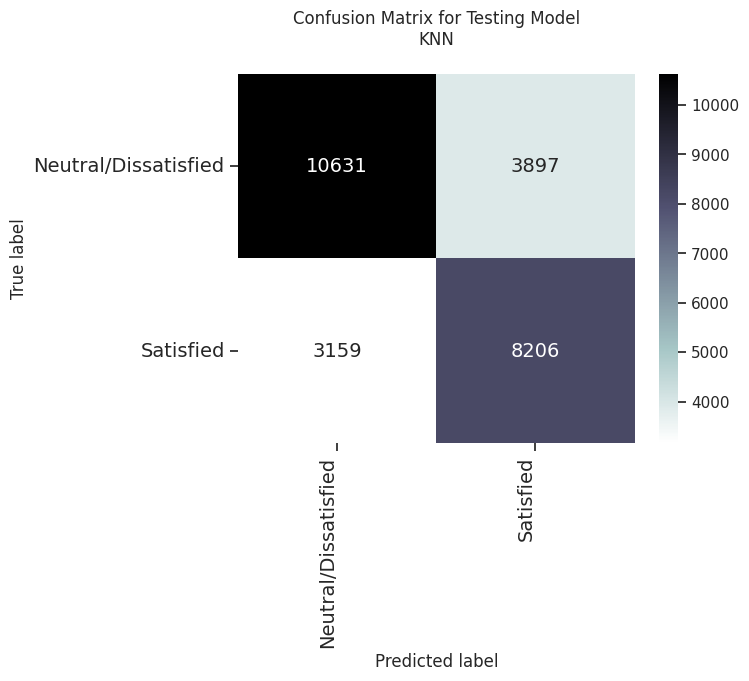

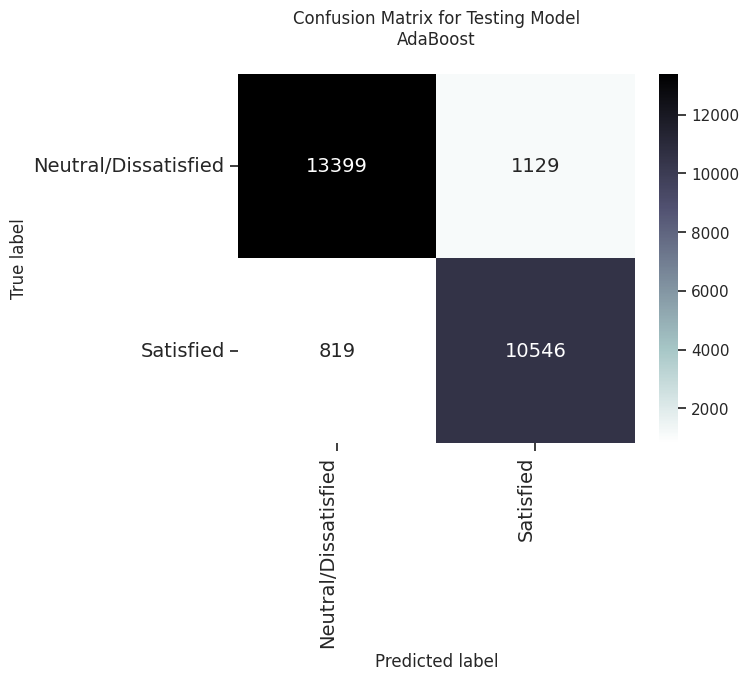

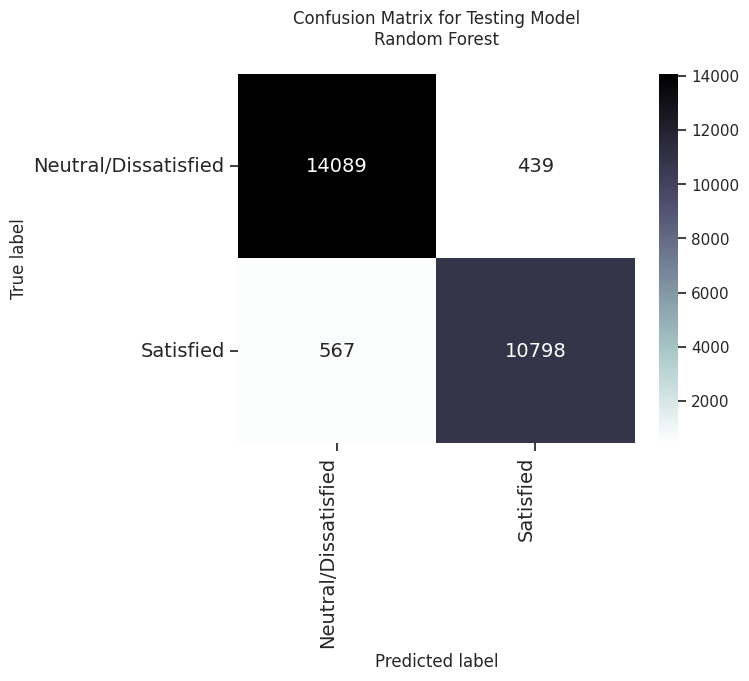

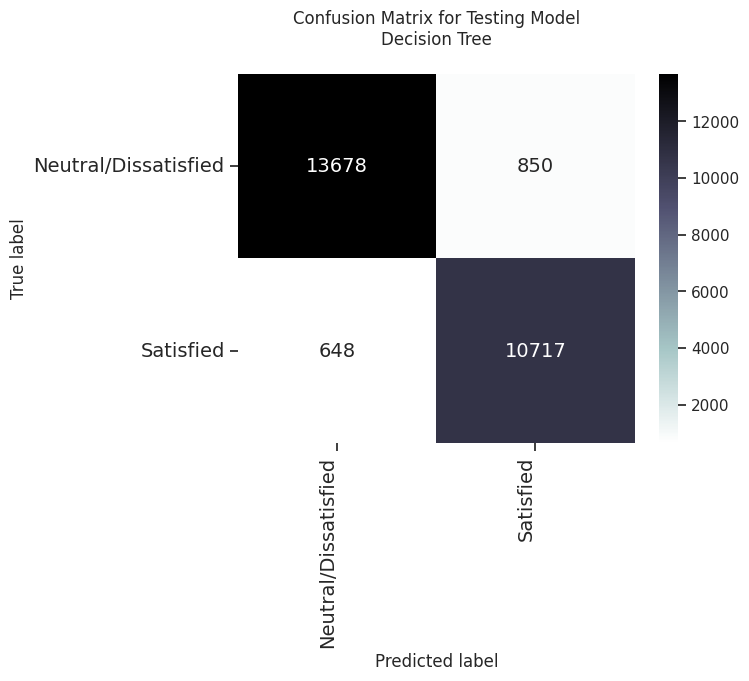

In [ ]:
for name_model, model in (modelList.items()):
  # print(f"Running model {name_model}")
  # scores = cross_validate(model, X_train, y_train, scoring=scoring, cv = 5)
  # print(accuracy_score(y_test,y_pred_lg))
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # form confusion matrix as a dataFrame
  confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_pred)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# plot confusion matrix
  plt.figure()
  heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

  # print(f'Accurracy rate {accuracy_score(y_test,y_pred)}')
  plt.title(f'Confusion Matrix for Testing Model\n{name_model}\n')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.xticks(rotation = 90)
  plt.show();

